#Introduction



---


NAMA: MITRA MARONA PUTRA GURUSINGA

BATCH HCK 006

FINAL PROJECT


---



---



#Dataset & Objective



---

**Dataset**

Pada proyek ini, saya mengambil dataset dari website UCI Machine Learning Repository yang dapat diakses melalui laman berikut: https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

Kumpulan data ini berisi informasi tentang pembayaran gagal bayar, faktor demografis, status pembayaran, riwayat pembayaran, dan laporan tagihan klien kartu kredit di Taiwan dari April 2005 hingga September 2005.

Dataset ini banyak digunakan untuk menjadi bahan pembelajaran untuk membuat model prediktif terhadap kolom default_payment yang bernilai 1 = Yes, dan 0 = No. Di mana diharapkan model prediktif tersebut dapat memprediksi apakah nasabah memiliki resiko gagal bayar di bulan berikutnya.


---

**Objective**

* Dalam proyek kali ini, saya lebih memilih untuk melakukan clustering dengan memanfaatkan informasi yang diberikan dataset ini mengenai perilaku dan status kredit setiap nasabah. Di mana pada proyek ini saya menggunakan model K-means yang sangat sesuai untuk melakukan clustering dari input berupa variabel-variabel numerik.

* Melalui proyek ini, diharapkan dapat menjadi wawasan dan informasi mengenai bagaimana suatu model atau algoritma dapat melakukan pengelompokan dari setiap data angka yang diberikan sebagai input. Di mana jika dilakukan secara manual mungkin mustahil untuk melihat karakteristik data-data yang hanya berupa angka, lalu mengelompokkannya sesuai karakteristik tertentu.

* Dengan menggunakan model ini, dapat dihasilkan klaster-klaster yang memiliki karakteristik tertentu berdasarkan perilaku nasabah bank dalam pembayaran kartu kredit mereka. Berdasarkan karakteristik setiap klaster ini, diharapkan dapat menjadi informasi berharga pada bank dalam menghadapi permasalahan atau melakukan marketing yang lebih efektif sesuai karakteristik setiap



---



---

**Workflow**

Berikut adalah tahap pengerjaan yang saya lakukan dalam proyek ini:

1. Data loading & review

  Pada tahap ini saya melakukan loading dan review singkat untuk mendapatkan informasi secara umum pada dataset saya

2. Eksplorasi analisis data (sebelum klastering)

  Pada tahap ini saya melakukan eksplorasi secara keseluruhan dari dataset awal saya. Dari tahap ini saya dapat mengambil keputusan mengenai tahap selanjutnya sebelum dilakukan klastering

3. Feature Engineering

  Pada tahap ini saya melakukan modifikasi beberapa kolom yang diperlukan, untuk mendapat informasi tambahan yang bisa diambil dengan mengekstrak informasi dari kolom-kolom yang sudah tersedia

4. PCA
  
  Pada tahap ini saya melakukan Principal Components Analysis untuk mereduksi kolom-kolom dataset yang akan saya gunakan sebagai input pada modelm, untuk mendapatkan komponen-komponen yang penting dari semua kolom saya

5. K-means Model

  Pada tahap ini saya melakukan klustering dengan menentukan jumlah kluster yang optimal dengan elbow dan silhouette methode

6. Eksplorasi analisis data (setelah klastering)

  Pada tahap ini saya melakukan eksplorasi lebih mendalam untuk mendapatkan informasi mengenai karakteristik setiap klaster berdasarkan kolom-kolom yang penting untuk dianalisa.

#Import dan Instalasi Pustaka

In [1]:
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 5.1 MB/s eta 0:00:00


In [2]:
#menginstall semua library yang diperlukan
import pandas as pd
from feature_engine.outliers import Winsorizer
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering as SC, AgglomerativeClustering as AC
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import pickle

import warnings
warnings.filterwarnings(action='ignore')


#Data Loading and Review

Pada tahap ini, saya membuat variabel dataframe dengan nama variabel df yang berisi dataset saya dan melakukan beberapa penelusuran singkat terkait dataset.

In [3]:
#membaca data dari file Excel yang diberikan
df = pd.read_excel("/content/default of credit card clients.xls", header=1)

#menampilkan 5 baris pertama dari data
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [4]:
#mengubah nama kolom sesuai dengan deskripsi yang diberikan
column_map = {
    "LIMIT_BAL": "limit_amount",
    "SEX": "gender",
    "EDUCATION": "education",
    "MARRIAGE": "marital_status",
    "AGE": "age",
    "PAY_0": "repay_sep",
    "PAY_2": "repay_aug",
    "PAY_3": "repay_jul",
    "PAY_4": "repay_jun",
    "PAY_5": "repay_may",
    "PAY_6": "repay_apr",
    "BILL_AMT1": "bill_sep",
    "BILL_AMT2": "bill_aug",
    "BILL_AMT3": "bill_jul",
    "BILL_AMT4": "bill_jun",
    "BILL_AMT5": "bill_may",
    "BILL_AMT6": "bill_apr",
    "PAY_AMT1": "paid_sep",
    "PAY_AMT2": "paid_aug",
    "PAY_AMT3": "paid_jul",
    "PAY_AMT4": "paid_jun",
    "PAY_AMT5": "paid_may",
    "PAY_AMT6": "paid_apr",
    "default payment next month": "default_payment"
}

df.rename(columns=column_map, inplace=True)
df.head().T


0       1      2      3      4
ID                   1       2      3      4      5
limit_amount     20000  120000  90000  50000  50000
gender               2       2      2      2      1
education            2       2      2      2      2
marital_status       1       2      2      1      1
age                 24      26     34     37     57
repay_sep            2      -1      0      0     -1
repay_aug            2       2      0      0      0
repay_jul           -1       0      0      0     -1
repay_jun           -1       0      0      0      0
repay_may           -2       0      0      0      0
repay_apr           -2       2      0      0      0
bill_sep          3913    2682  29239  46990   8617
bill_aug          3102    1725  14027  48233   5670
bill_jul           689    2682  13559  49291  35835
bill_jun             0    3272  14331  28314  20940
bill_may             0    3455  14948  28959  19146
bill_apr             0    3261  15549  29547  19131
paid_sep             0       0   1518   2000   2000
paid_aug           689    1000   1500   2019  36681
paid_jul             0    1000   1000   1200  10000
paid_jun             0    1000   1000   1100   9000
paid_may             0       0   1000   1069    689
paid_apr             0    2000   5000   1000    679
default_payment      1       1      0      0      0

In [5]:
#melihat shape dataframe
df.shape

(30000, 25)

In [6]:
#melihat kolom-kolom dataframe
df.columns

Index(['ID', 'limit_amount', 'gender', 'education', 'marital_status', 'age',
       'repay_sep', 'repay_aug', 'repay_jul', 'repay_jun', 'repay_may',
       'repay_apr', 'bill_sep', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may',
       'bill_apr', 'paid_sep', 'paid_aug', 'paid_jul', 'paid_jun', 'paid_may',
       'paid_apr', 'default_payment'],
      dtype='object')

In [7]:
#melihat informasi dataset dari tipe data, jumlah baris, dan memori data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               30000 non-null  int64
 1   limit_amount     30000 non-null  int64
 2   gender           30000 non-null  int64
 3   education        30000 non-null  int64
 4   marital_status   30000 non-null  int64
 5   age              30000 non-null  int64
 6   repay_sep        30000 non-null  int64
 7   repay_aug        30000 non-null  int64
 8   repay_jul        30000 non-null  int64
 9   repay_jun        30000 non-null  int64
 10  repay_may        30000 non-null  int64
 11  repay_apr        30000 non-null  int64
 12  bill_sep         30000 non-null  int64
 13  bill_aug         30000 non-null  int64
 14  bill_jul         30000 non-null  int64
 15  bill_jun         30000 non-null  int64
 16  bill_may         30000 non-null  int64
 17  bill_apr         30000 non-null  int64
 18  paid_s

In [8]:
df.describe().T

count           mean            std       min       25%  \
ID               30000.0   15000.500000    8660.398374       1.0   7500.75   
limit_amount     30000.0  167484.322667  129747.661567   10000.0  50000.00   
gender           30000.0       1.603733       0.489129       1.0      1.00   
education        30000.0       1.853133       0.790349       0.0      1.00   
marital_status   30000.0       1.551867       0.521970       0.0      1.00   
age              30000.0      35.485500       9.217904      21.0     28.00   
repay_sep        30000.0      -0.016700       1.123802      -2.0     -1.00   
repay_aug        30000.0      -0.133767       1.197186      -2.0     -1.00   
repay_jul        30000.0      -0.166200       1.196868      -2.0     -1.00   
repay_jun        30000.0      -0.220667       1.169139      -2.0     -1.00   
repay_may        30000.0      -0.266200       1.133187      -2.0     -1.00   
repay_apr        30000.0      -0.291100       1.149988      -2.0     -1.00   
bill_sep         30000.0   51223.330900   73635.860576 -165580.0   3558.75   
bill_aug         30000.0   49179.075167   71173.768783  -69777.0   2984.75   
bill_jul         30000.0   47013.154800   69349.387427 -157264.0   2666.25   
bill_jun         30000.0   43262.948967   64332.856134 -170000.0   2326.75   
bill_may         30000.0   40311.400967   60797.155770  -81334.0   1763.00   
bill_apr         30000.0   38871.760400   59554.107537 -339603.0   1256.00   
paid_sep         30000.0    5663.580500   16563.280354       0.0   1000.00   
paid_aug         30000.0    5921.163500   23040.870402       0.0    833.00   
paid_jul         30000.0    5225.681500   17606.961470       0.0    390.00   
paid_jun         30000.0    4826.076867   15666.159744       0.0    296.00   
paid_may         30000.0    4799.387633   15278.305679       0.0    252.50   
paid_apr         30000.0    5215.502567   17777.465775       0.0    117.75   
default_payment  30000.0       0.221200       0.415062       0.0      0.00   

                      50%        75%        max  
ID                15000.5   22500.25    30000.0  
limit_amount     140000.0  240000.00  1000000.0  
gender                2.0       2.00        2.0  
education             2.0       2.00        6.0  
marital_status        2.0       2.00        3.0  
age                  34.0      41.00       79.0  
repay_sep             0.0       0.00        8.0  
repay_aug             0.0       0.00        8.0  
repay_jul             0.0       0.00        8.0  
repay_jun             0.0       0.00        8.0  
repay_may             0.0       0.00        8.0  
repay_apr             0.0       0.00        8.0  
bill_sep          22381.5   67091.00   964511.0  
bill_aug          21200.0   64006.25   983931.0  
bill_jul          20088.5   60164.75  1664089.0  
bill_jun          19052.0   54506.00   891586.0  
bill_may          18104.5   50190.50   927171.0  
bill_apr          17071.0   49198.25   961664.0  
paid_sep           2100.0    5006.00   873552.0  
paid_aug           2009.0    5000.00  1684259.0  
paid_jul           1800.0    4505.00   896040.0  
paid_jun           1500.0    4013.25   621000.0  
paid_may           1500.0    4031.50   426529.0  
paid_apr           1500.0    4000.00   528666.0  
default_payment       0.0       0.00        1.0

In [9]:
#melihat seluruh nilai unik dalam kolom
df.nunique()

ID                 30000
limit_amount          81
gender                 2
education              7
marital_status         4
age                   56
repay_sep             11
repay_aug             11
repay_jul             11
repay_jun             11
repay_may             10
repay_apr             10
bill_sep           22723
bill_aug           22346
bill_jul           22026
bill_jun           21548
bill_may           21010
bill_apr           20604
paid_sep            7943
paid_aug            7899
paid_jul            7518
paid_jun            6937
paid_may            6897
paid_apr            6939
default_payment        2
dtype: int64

In [10]:
#melihat missing values
df.isna().sum()

ID                 0
limit_amount       0
gender             0
education          0
marital_status     0
age                0
repay_sep          0
repay_aug          0
repay_jul          0
repay_jun          0
repay_may          0
repay_apr          0
bill_sep           0
bill_aug           0
bill_jul           0
bill_jun           0
bill_may           0
bill_apr           0
paid_sep           0
paid_aug           0
paid_jul           0
paid_jun           0
paid_may           0
paid_apr           0
default_payment    0
dtype: int64

#Exploratory Data Analysis (Before Clustering)

In [11]:
df_eda = df.copy()

In [12]:
#mengubah isi kolom sesuai dengan kategori yang diberikan

#mengubah kolom gender
df_eda['gender'] = df['gender'].map({1: 'male', 2: 'female'})

#mengubah kolom education
education_map = {
    1: 'graduate school',
    2: 'university',
    3: 'high school',
    4: 'others'
}
df_eda['education'] = df['education'].map(education_map).fillna('others')

#mengubah kolom marital_status
marital_map = {
    1: 'married',
    2: 'single',
    3: 'others'
}
df_eda['marital_status'] = df['marital_status'].map(marital_map).fillna('others')

#mengubah kolom repay_*
repay_cols = ['repay_sep', 'repay_aug', 'repay_jul', 'repay_jun', 'repay_may', 'repay_apr']
repay_map = {
    -1: 'pay_duly',
    1: 'delay_one_month',
    2: 'delay_two_months',
    3: 'delay_three_months',
    4: 'delay_four_months',
    5: 'delay_five_months',
    6: 'delay_six_months',
    7: 'delay_seven_months',
    8: 'delay_eight_months',
    9: 'delay_nine_months_above'
}
for col in repay_cols:
    df_eda[col] = df[col].map(repay_map).fillna('others')

df_eda.head()


ID  limit_amount  gender   education marital_status  age         repay_sep  \
0   1         20000  female  university        married   24  delay_two_months   
1   2        120000  female  university         single   26          pay_duly   
2   3         90000  female  university         single   34            others   
3   4         50000  female  university        married   37            others   
4   5         50000    male  university        married   57          pay_duly   

          repay_aug repay_jul repay_jun  ... bill_jun bill_may  bill_apr  \
0  delay_two_months  pay_duly  pay_duly  ...        0        0         0   
1  delay_two_months    others    others  ...     3272     3455      3261   
2            others    others    others  ...    14331    14948     15549   
3            others    others    others  ...    28314    28959     29547   
4            others  pay_duly    others  ...    20940    19146     19131   

   paid_sep  paid_aug  paid_jul  paid_jun  paid_may  paid_apr  default_payment  
0         0       689         0         0         0         0                1  
1         0      1000      1000      1000         0      2000                1  
2      1518      1500      1000      1000      1000      5000                0  
3      2000      2019      1200      1100      1069      1000                0  
4      2000     36681     10000      9000       689       679                0  

[5 rows x 25 columns]

In [13]:
df_eda.describe().T

count           mean            std       min       25%  \
ID               30000.0   15000.500000    8660.398374       1.0   7500.75   
limit_amount     30000.0  167484.322667  129747.661567   10000.0  50000.00   
age              30000.0      35.485500       9.217904      21.0     28.00   
bill_sep         30000.0   51223.330900   73635.860576 -165580.0   3558.75   
bill_aug         30000.0   49179.075167   71173.768783  -69777.0   2984.75   
bill_jul         30000.0   47013.154800   69349.387427 -157264.0   2666.25   
bill_jun         30000.0   43262.948967   64332.856134 -170000.0   2326.75   
bill_may         30000.0   40311.400967   60797.155770  -81334.0   1763.00   
bill_apr         30000.0   38871.760400   59554.107537 -339603.0   1256.00   
paid_sep         30000.0    5663.580500   16563.280354       0.0   1000.00   
paid_aug         30000.0    5921.163500   23040.870402       0.0    833.00   
paid_jul         30000.0    5225.681500   17606.961470       0.0    390.00   
paid_jun         30000.0    4826.076867   15666.159744       0.0    296.00   
paid_may         30000.0    4799.387633   15278.305679       0.0    252.50   
paid_apr         30000.0    5215.502567   17777.465775       0.0    117.75   
default_payment  30000.0       0.221200       0.415062       0.0      0.00   

                      50%        75%        max  
ID                15000.5   22500.25    30000.0  
limit_amount     140000.0  240000.00  1000000.0  
age                  34.0      41.00       79.0  
bill_sep          22381.5   67091.00   964511.0  
bill_aug          21200.0   64006.25   983931.0  
bill_jul          20088.5   60164.75  1664089.0  
bill_jun          19052.0   54506.00   891586.0  
bill_may          18104.5   50190.50   927171.0  
bill_apr          17071.0   49198.25   961664.0  
paid_sep           2100.0    5006.00   873552.0  
paid_aug           2009.0    5000.00  1684259.0  
paid_jul           1800.0    4505.00   896040.0  
paid_jun           1500.0    4013.25   621000.0  
paid_may           1500.0    4031.50   426529.0  
paid_apr           1500.0    4000.00   528666.0  
default_payment       0.0       0.00        1.0

Terlihat ada anomali di mana di kolom tagihan terdapat nilai minus. Sehingga pada kasus ini saya menganggap hal tersebut sebagai missing values, lalu melakukan handling dengan mengimputasinya menggunakan nilai median

In [14]:
#melakukan imputasi untuk seluruh nilai min pada kolom bill_amt untuk diisi median masing-masing kolom
for i in ['bill_sep', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr']:
    df_eda.loc[(df_eda[f'{i}'] < 0), f'{i}']= df_eda[f'{i}'].median()

In [15]:
df_eda.describe().T

count           mean            std      min       25%  \
ID               30000.0   15000.500000    8660.398374      1.0   7500.75   
limit_amount     30000.0  167484.322667  129747.661567  10000.0  50000.00   
age              30000.0      35.485500       9.217904     21.0     28.00   
bill_sep         30000.0   51686.211400   73366.782527      0.0   4475.50   
bill_aug         30000.0   49679.278033   70892.175152      0.0   4000.00   
bill_jul         30000.0   47483.767750   69082.867162      0.0   3637.25   
bill_jun         30000.0   43728.321933   64067.954070      0.0   3126.00   
bill_may         30000.0   40742.373683   60561.410535      0.0   2435.75   
bill_apr         30000.0   39333.763700   59244.081446      0.0   1831.00   
paid_sep         30000.0    5663.580500   16563.280354      0.0   1000.00   
paid_aug         30000.0    5921.163500   23040.870402      0.0    833.00   
paid_jul         30000.0    5225.681500   17606.961470      0.0    390.00   
paid_jun         30000.0    4826.076867   15666.159744      0.0    296.00   
paid_may         30000.0    4799.387633   15278.305679      0.0    252.50   
paid_apr         30000.0    5215.502567   17777.465775      0.0    117.75   
default_payment  30000.0       0.221200       0.415062      0.0      0.00   

                       50%        75%        max  
ID                15000.50   22500.25    30000.0  
limit_amount     140000.00  240000.00  1000000.0  
age                  34.00      41.00       79.0  
bill_sep          22381.75   67091.00   964511.0  
bill_aug          21201.50   64006.25   983931.0  
bill_jul          20088.75   60164.75  1664089.0  
bill_jun          19052.00   54506.00   891586.0  
bill_may          18104.75   50190.50   927171.0  
bill_apr          17072.50   49198.25   961664.0  
paid_sep           2100.00    5006.00   873552.0  
paid_aug           2009.00    5000.00  1684259.0  
paid_jul           1800.00    4505.00   896040.0  
paid_jun           1500.00    4013.25   621000.0  
paid_may           1500.00    4031.50   426529.0  
paid_apr           1500.00    4000.00   528666.0  
default_payment       0.00       0.00        1.0

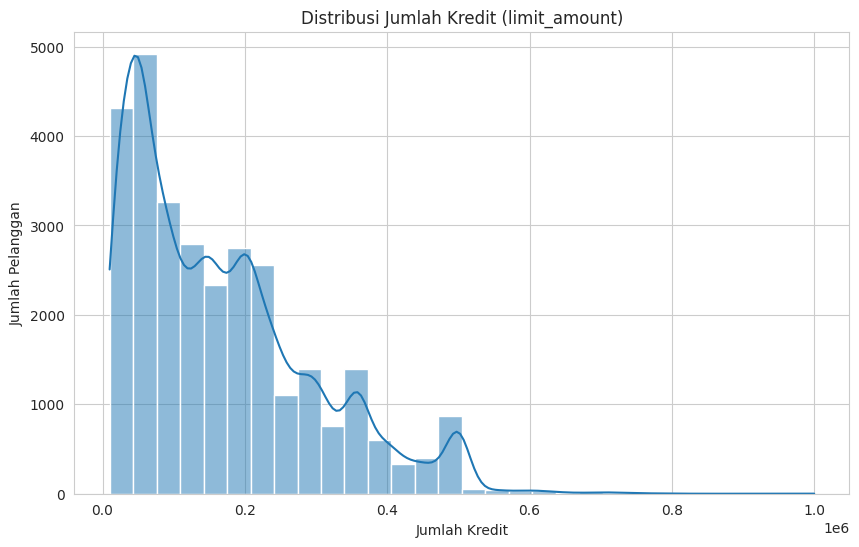

In [16]:
#mengatur gaya visualisasi
sns.set_style("whitegrid")

#distribusi limit_amount
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['limit_amount'], bins=30, kde=True)
plt.title("Distribusi Jumlah Kredit (limit_amount)")
plt.xlabel("Jumlah Kredit")
plt.ylabel("Jumlah Pelanggan")
plt.show()


Dari visualisasi di atas, kita dapat melihat bahwa sebagian besar pelanggan memiliki jumlah kredit yang lebih rendah, dengan sejumlah kecil pelanggan yang memiliki kredit dengan jumlah yang sangat tinggi.

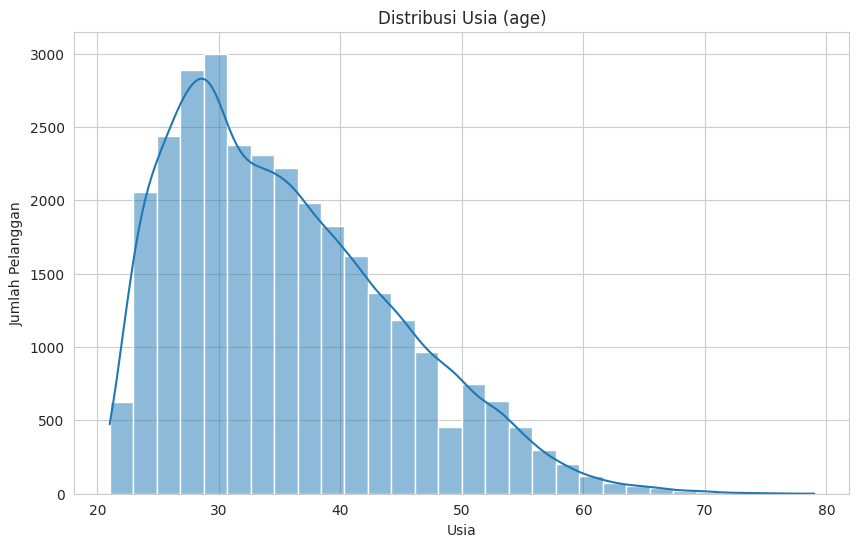

In [17]:
#distribusi age
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['age'], bins=30, kde=True)
plt.title("Distribusi Usia (age)")
plt.xlabel("Usia")
plt.ylabel("Jumlah Pelanggan")
plt.show()


Dari visualisasi di atas, kita dapat melihat bahwa sebagian besar pelanggan berusia antara 20 hingga 40 tahun, dengan frekuensi yang menurun seiring bertambahnya usia.

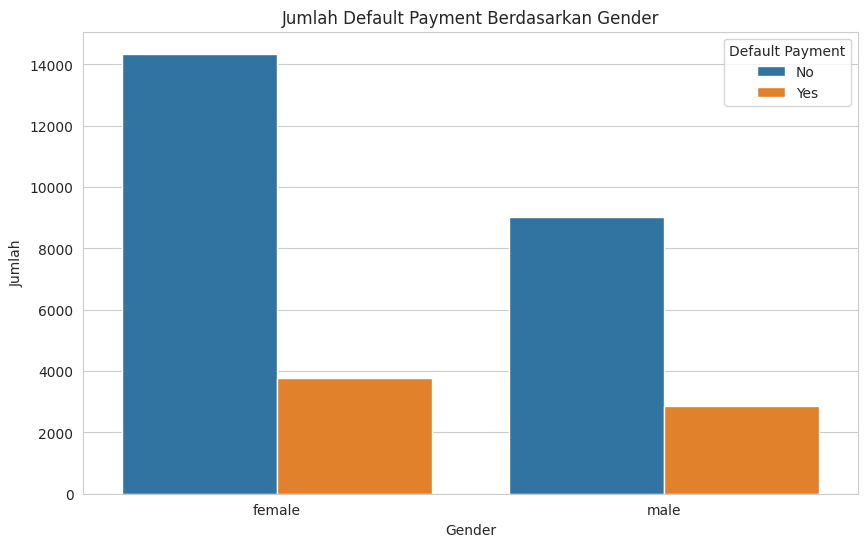

In [18]:
#jumlah default payment berdasarkan gender
plt.figure(figsize=(10, 6))
sns.countplot(x="gender", hue="default_payment", data=df_eda)
plt.title("Jumlah Default Payment Berdasarkan Gender")
plt.xlabel("Gender")
plt.ylabel("Jumlah")
plt.legend(title="Default Payment", labels=["No", "Yes"])
plt.show()


Dari visualisasi di atas, kita dapat melihat bahwa:

* Jumlah wanita yang memiliki kartu kredit lebih banyak dibandingkan pria.
* Proporsi wanita yang mengalami pembayaran default terlihat sedikit lebih tinggi dibandingkan pria.

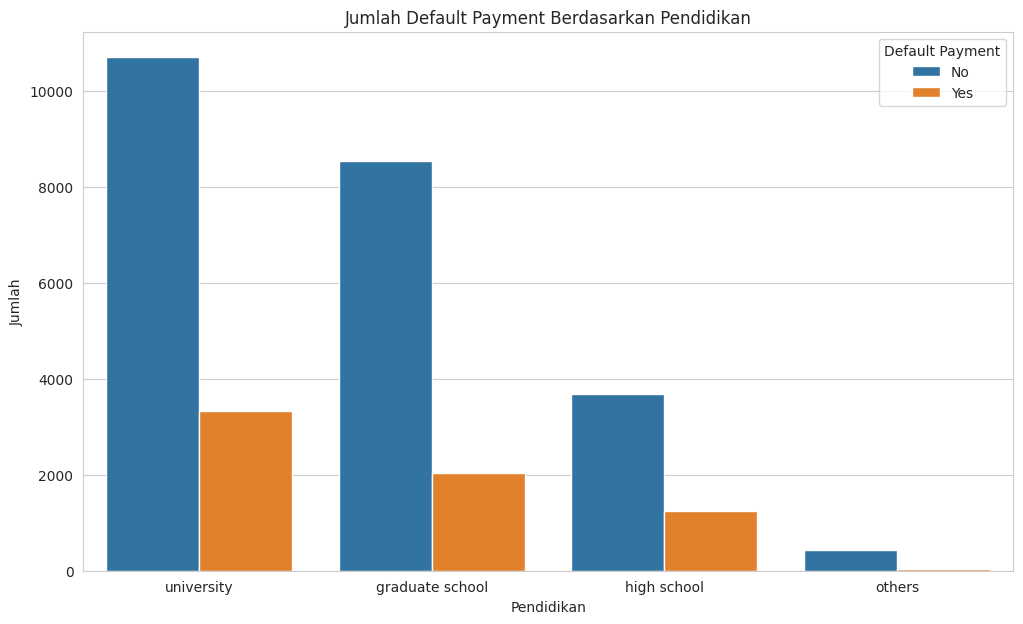

In [19]:
#jumlah default payment berdasarkan education
plt.figure(figsize=(12, 7))
sns.countplot(x="education", hue="default_payment", data=df_eda, order=df_eda['education'].value_counts().index)
plt.title("Jumlah Default Payment Berdasarkan Pendidikan")
plt.xlabel("Pendidikan")
plt.ylabel("Jumlah")
plt.legend(title="Default Payment", labels=["No", "Yes"])
plt.show()


Dari visualisasi di atas, kita dapat melihat bahwa:

* Pelanggan dengan latar belakang pendidikan universitas adalah yang terbanyak, diikuti oleh lulusan sekolah pascasarjana dan sekolah menengah.
* Proporsi pembayaran default terlihat lebih tinggi di kalangan pelanggan dengan latar belakang pendidikan universitas, diikuti oleh sekolah menengah.

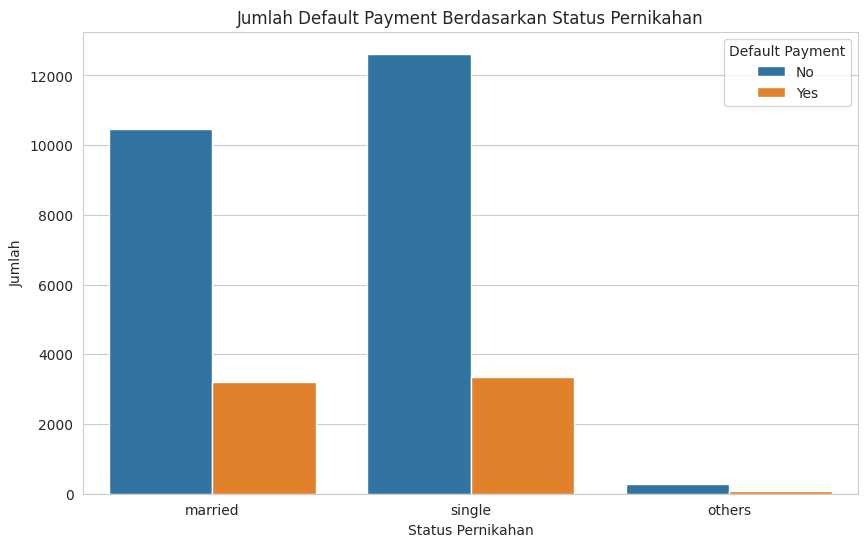

In [20]:
#jumlah default payment berdasarkan marital_status
plt.figure(figsize=(10, 6))
sns.countplot(x="marital_status", hue="default_payment", data=df_eda)
plt.title("Jumlah Default Payment Berdasarkan Status Pernikahan")
plt.xlabel("Status Pernikahan")
plt.ylabel("Jumlah")
plt.legend(title="Default Payment", labels=["No", "Yes"])
plt.show()


Dari visualisasi di atas, kita dapat melihat bahwa:

* Pelanggan yang berstatus single lebih banyak dibandingkan dengan yang sudah menikah.
* Meskipun demikian, proporsi pembayaran default antara pelanggan yang sudah menikah dan single terlihat hampir mirip.

#Feature Engineering

Pada tahap ini, saya melakukan feature engineering, yaitu melakukan penambahan beberapa fitur yang didapat dengan mengekstrak informasi dari fitur-fitur yang sudah ada. Berikut adalah alasan mengapa saya melakukan penambahan fitur:

* Pada dataset ini, ada fitur-fitur berisi informasi per bulan tertentu, sehingga terlalu banyak fitur yang memiliki informasi yang sama namun hanya berbeda bulan.
* Pada dataset ini, dapat terlihat catatan perilaku pembayaran pelanggan dengan melihat status pembayaran per bulannya dalam total 6 bulan dari dataset ini.
* Selain itu, dapat juga dilihat status pemakaian kartu kredit setiap nasabah berdasarkan jumlah atau rata-rata pembayaran dan tagihan nasabah dalam 6 bulan.

In [21]:
df_fe = df_eda.copy()

In [22]:
# 1. Utilization Ratio
for month in ['sep', 'aug', 'jul', 'jun', 'may', 'apr']:
    df_fe[f'utilization_{month}'] = df_eda[f'bill_{month}'] / df_eda['limit_amount']

# 2. Total Payment
df_fe['total_payment'] = df_eda[['paid_sep', 'paid_aug', 'paid_jul', 'paid_jun', 'paid_may', 'paid_apr']].sum(axis=1)

# 3. Total Bill
df_fe['total_bill'] = df_eda[['bill_sep', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr']].sum(axis=1)

# 4. Average Payment
df_fe['avg_payment'] = df_fe['total_payment'] / 6

# 5. Payment to Bill Ratio
df_fe['payment_to_bill_ratio'] = df_fe['total_payment'] / df_fe['total_bill'].replace(0, 1)

# 6. Consistent Payer
repay_columns = ['repay_sep', 'repay_aug', 'repay_jul', 'repay_jun', 'repay_may', 'repay_apr']
df_fe['consistent_payer'] = df_eda[repay_columns].apply(lambda x: (x == 'pay_duly').all(), axis=1).astype(int)

# 7. Membuat fitur Delayed_Payments
df_fe['delayed_payments'] = df_eda[repay_columns].apply(lambda x: sum([(val != 'pay_duly') for val in x]), axis=1)

# 8. Memetakan string keterlambatan ke angka yang sesuai dan menggunakan mapping untuk menghitung keterlambatan maksimum
delay_mapping = {
    'delay_one_month': 1,
    'delay_two_months': 2,
    'delay_three_months': 3,
    'delay_four_months': 4,
    'delay_five_months': 5,
    'delay_six_months': 6,
    'delay_seven_months': 7,
    'delay_eight_months': 8,
    'delay_nine_months_above': 9,
    'pay_duly': 0,
    'others': 0
}

df_fe['max_delay'] = df_eda[repay_columns].replace(delay_mapping).max(axis=1)

# 9. Recent_Delay untuk September 2005
df_fe['recent_delay'] = df_eda['repay_sep'].replace(delay_mapping).apply(lambda x: 1 if x > 0 else 0)

# 10. Trend_Payment
df_fe['trend_payment'] = df_eda['repay_sep'].replace(delay_mapping) - df_eda['repay_apr'].replace(delay_mapping)

# 11. Count_Duly_Paid
df_fe['count_duly_paid'] = (df_eda[repay_columns] == 'pay_duly').sum(axis=1)

# 12. Sequential_Delay: 3 bulan terakhir
def check_sequential_delay(row):
    last_three = row[-3:].replace(delay_mapping)
    return (last_three > 0).all()
df_fe['sequential_delay'] = df_eda[repay_columns].apply(check_sequential_delay, axis=1).astype(int)

# 13. Remaining_Balance
df_fe['remaining_balance'] = df_fe['total_bill'] - df_fe['total_payment']

# 14. Recent_Bill_to_Credit
df_fe['recent_bill_to_credit'] = df_eda['bill_sep'] / df_eda['limit_amount']

# 15. Recent_Payment_to_Credit
df_fe['recent_payment_to_credit'] = df_eda['paid_sep'] / df_eda['limit_amount']

In [23]:
#melihat 5 sampel data
df_fe.sample(5).T

17358            22299        18962  \
ID                                     17359            22300        18963   
limit_amount                          120000           200000       100000   
gender                                female           female       female   
education                         university  graduate school   university   
marital_status                       married           single       single   
age                                       42               29           30   
repay_sep                   delay_two_months  delay_one_month       others   
repay_aug                   delay_two_months           others       others   
repay_jul                 delay_three_months         pay_duly       others   
repay_jun                   delay_two_months         pay_duly       others   
repay_may                   delay_two_months           others       others   
repay_apr                 delay_three_months         pay_duly       others   
bill_sep                             25809.0              0.0      92683.0   
bill_aug                               29366                0        84278   
bill_jul                             28615.0          35063.0      86977.0   
bill_jun                               29347                0        89575   
bill_may                             30868.0              0.0      91382.0   
bill_apr                               30099             5799        93320   
paid_sep                                4300                0         3324   
paid_aug                                   0            35063         3428   
paid_jul                                1500            16720         3399   
paid_jun                                2300                0         2546   
paid_may                                   0             5799         2671   
paid_apr                                   0                0         2939   
default_payment                            1                1            0   
utilization_sep                     0.215075              0.0      0.92683   
utilization_aug                     0.244717              0.0      0.84278   
utilization_jul                     0.238458         0.175315      0.86977   
utilization_jun                     0.244558              0.0      0.89575   
utilization_may                     0.257233              0.0      0.91382   
utilization_apr                     0.250825         0.028995       0.9332   
total_payment                           8100            57582        18307   
total_bill                          174104.0          40862.0     538215.0   
avg_payment                           1350.0           9597.0  3051.166667   
payment_to_bill_ratio               0.046524         1.409182     0.034014   
consistent_payer                           0                0            0   
delayed_payments                           6                3            6   
max_delay                                  3                1            0   
recent_delay                               1                1            0   
trend_payment                             -1                1            0   
count_duly_paid                            0                3            0   
sequential_delay                           1                0            0   
remaining_balance                   166004.0         -16720.0     519908.0   
recent_bill_to_credit               0.215075              0.0      0.92683   
recent_payment_to_credit            0.035833              0.0      0.03324   

                                    23363        18543  
ID                                  23364        18544  
limit_amount                       400000       210000  
gender                             female       female  
education                 graduate school   university  
marital_status                     single       single  
age                                    35           24  
repay_sep                          others       oth

In [24]:
#melihat shape dataframe
df.shape

(30000, 25)

In [25]:
df_fe.shape

(30000, 45)

In [26]:
#melihat nilai unik kolom max_delay
df_fe.max_delay.value_counts()

0    19931
2     7187
1     1689
3      789
4      218
5       69
7       67
6       25
8       25
Name: max_delay, dtype: int64

Berikut adalah fitur-fitur yang saya tambahkan dan penjelasannya:
1. Utilization Ratio: fitur ini menunjukkan seberapa besar dari batas kredit yang digunakan oleh pelanggan setiap bulannya. Rasio pemanfaatan memberikan gambaran tentang seberapa besar seorang pelanggan menggunakan kredit mereka dibandingkan dengan batas maksimum yang mereka miliki. Sebuah rasio yang tinggi bisa mengindikasikan bahwa pelanggan tersebut bergantung pada kredit mereka, sementara rasio yang rendah bisa menunjukkan bahwa mereka menggunakan kredit mereka dengan bijak dan dalam batas kemampuan mereka.


2. Total Payment: jumlah total yang dibayar oleh pelanggan selama periode 6 bulan. Total pembayaran menggambarkan jumlah total yang telah dibayarkan oleh pelanggan selama periode enam bulan. Jumlah yang lebih besar menunjukkan bahwa pelanggan tersebut telah melakukan banyak pembayaran, yang mungkin mengindikasikan kepatuhan yang baik terhadap kewajiban keuangan mereka. Sebaliknya, total pembayaran yang lebih rendah mungkin menandakan bahwa pelanggan tersebut jarang membayar atau membayar dalam jumlah yang kecil, yang mungkin mengindikasikan potensi risiko gagal bayar di masa depan.


3. Total Bill: jumlah total tagihan yang diterima oleh pelanggan selama periode 6 bulan. Total tagihan menggambarkan jumlah total tagihan yang diterima oleh pelanggan selama periode enam bulan. Jumlah yang lebih besar menunjukkan bahwa pelanggan tersebut memiliki beban hutang yang lebih tinggi selama periode tersebut, sementara jumlah yang lebih rendah mengindikasikan hutang yang lebih rendah.


4. Average Payment: rata-rata jumlah yang dibayar oleh pelanggan selama periode 6 bulan. Pembayaran rata-rata yang lebih tinggi menunjukkan kepatuhan keuangan yang lebih baik dan kemampuan untuk membayar kembali hutang, sedangkan pembayaran rata-rata yang lebih rendah mungkin menunjukkan kesulitan keuangan.


5. Payment to Bill Ratio: rasio dari total pembayaran dibandingkan dengan total tagihan selama periode 6 bulan. Rasio yang mendekati 1 mengindikasikan bahwa pelanggan membayar sebagian besar atau seluruh tagihan mereka, menunjukkan perilaku pembayaran yang baik. Rasio yang lebih rendah menunjukkan bahwa pelanggan membayar proporsi yang lebih kecil dari tagihan mereka.

6. Consistent Payer: fitur biner yang menandakan apakah pelanggan selalu membayar tepat waktu selama 6 bulan terakhir. Kolom ini akan memiliki nilai 1 untuk pelanggan yang selalu membayar tepat waktu (dari bulan September hingga April) dan 0 untuk pelanggan yang memiliki setidaknya satu bulan di mana mereka tidak membayar tepat waktu.


7. Delayed_Payments: jumlah kali pelanggan mengalami keterlambatan pembayaran selama 6 bulan terakhir. Fitur ini menghitung berapa kali seorang pelanggan terlambat membayar selama enam bulan. Jika seorang pelanggan memiliki banyak keterlambatan pembayaran, ini menunjukkan pola perilaku yang mungkin berisiko bagi pemberi kredit. Pelanggan dengan angka yang lebih tinggi untuk fitur ini mungkin dianggap lebih berisiko dari segi kemungkinan gagal bayar di masa depan.


8. Max_Delay: keterlambatan pembayaran tertinggi (dalam bulan) yang dialami pelanggan selama 6 bulan terakhir. Fitur ini mengidentifikasi bulan dengan keterlambatan pembayaran terpanjang. Jika seorang pelanggan memiliki keterlambatan maksimum yang tinggi, ini menunjukkan bahwa ada waktu di mana mereka benar-benar mengalami kesulitan keuangan atau mungkin mengabaikan kewajiban pembayaran mereka.


9. Recent_Delay: apakah pelanggan mengalami keterlambatan pembayaran pada bulan terakhir (September 2005). Fitur ini menentukan apakah pelanggan mengalami keterlambatan pada bulan September. Pembayaran yang terlambat di bulan-bulan terakhir dapat dianggap lebih berisiko dibandingkan dengan keterlambatan di bulan-bulan sebelumnya, karena menunjukkan masalah keuangan atau perilaku pembayaran yang berkelanjutan.


10. Trend_Payment: fitur ini dapat menunjukkan apakah perilaku pembayaran pelanggan membaik, memburuk, atau tetap stabil selama 6 bulan terakhir. Ini dihitung dengan mengambil selisih antara status pembayaran bulan pertama dan bulan terakhir. Nilai positif dapat menunjukkan adanya peningkatan dalam perilaku pembayaran (misalnya, bergerak dari keterlambatan 2 bulan menjadi tepat waktu), sedangkan nilai negatif menunjukkan sebaliknya. Fitur ini mengukur perubahan dalam perilaku pembayaran dari April ke September. Jika tren ini positif, ini berarti perilaku pembayaran pelanggan memburuk; jika negatif, perilaku pembayaran membaik.



11. Count_Duly_Paid: menghitung berapa kali pelanggan membayar tepat waktu dalam 6 bulan terakhir. Fitur ini menghitung berapa kali pelanggan membayar tepat waktu selama enam bulan. Pelanggan dengan angka yang tinggi untuk fitur ini menunjukkan perilaku pembayaran yang baik dan konsistensi dalam memenuhi kewajiban keuangan mereka.


12. Sequential_Delay: menunjukkan apakah pelanggan mengalami keterlambatan pembayaran secara berurutan selama beberapa bulan terakhir. Ini dapat menjadi tanda bahwa pelanggan sedang mengalami kesulitan keuangan yang berkepanjangan. Fitur ini menentukan apakah pelanggan mengalami keterlambatan pembayaran berturut-turut selama tiga bulan terakhir. Keterlambatan berturut-turut menunjukkan pola perilaku pembayaran yang memburuk dan mungkin lebih berisiko bagi pemberi kredit.


13. Remaining_Balance: fitur ini menjadi perbedaan antara total_bill dan total_payment, memberikan gambaran tentang seberapa banyak saldo yang masih harus dibayar oleh pelanggan setelah melakukan pembayaran. Fitur ini menghitung saldo hutang yang belum dibayar oleh pelanggan. Saldo yang lebih tinggi mengindikasikan hutang yang lebih besar, yang mungkin menjadi pertanda kesulitan keuangan atau potensi gagal bayar di masa depan.


14. Recent_Bill_to_Credit: rasio antara bill_sep_2005 (tagihan terbaru) dan limit_amount, memberikan gambaran tentang seberapa besar tagihan terakhir mereka relatif terhadap batas kredit mereka. Fitur ini menunjukkan rasio tagihan bulan September dibandingkan dengan batas kredit pelanggan. Rasio yang mendekati 1 mengindikasikan bahwa pelanggan hampir mencapai batas kredit mereka, sementara rasio yang rendah mengindikasikan penggunaan kredit yang lebih bijak dan hati-hati.


15. Recent_Payment_to_Credit: rasio antara paid_sep_2005 (pembayaran terbaru) dan limit_amount, memberikan gambaran tentang seberapa besar pembayaran terakhir mereka relatif terhadap batas kredit mereka. Fitur ini menghitung rasio pembayaran bulan September dibandingkan dengan batas kredit pelanggan. Rasio yang tinggi menunjukkan kemampuan pelanggan untuk membayar kembali hutang mereka dengan cepat, sedangkan rasio yang rendah mungkin menunjukkan kesulitan keuangan atau keengganan untuk membayar.

#PCA

Pada tahap ini saya melakukan PCA yang akan mereduksi dimensi yang digunakan sebagai variabel input ke dalam model clustering. Dalam kasus ini, saya hanya akan memakai fitur-fitur numerikal baru yang sudah saya modifikasi sebelumnya untuk dilakukan PCA dan kemudian clustering.

In [27]:
#membuat fungsi untuk memeriksa outliers
def outliers(df, col, fold):
    for i in col:
      Q1 = df[i].quantile(.25)
      Q3 = df[i].quantile(.75)

      IQR = Q3 - Q1

      upper = Q3 + (fold * IQR)
      lower = Q1 - (fold * IQR)

      outlier = df[(df[i] <= lower) | (df[i] >= upper)]

      print('-'*30)
      print(f'{i}')
      print('percentage: ', len(outlier)/df.shape[0] * 100, '%')
      print('upper: ', upper)
      print('lower: ', lower)

In [28]:
#memeriksa nama kolom
df_fe.columns

Index(['ID', 'limit_amount', 'gender', 'education', 'marital_status', 'age',
       'repay_sep', 'repay_aug', 'repay_jul', 'repay_jun', 'repay_may',
       'repay_apr', 'bill_sep', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may',
       'bill_apr', 'paid_sep', 'paid_aug', 'paid_jul', 'paid_jun', 'paid_may',
       'paid_apr', 'default_payment', 'utilization_sep', 'utilization_aug',
       'utilization_jul', 'utilization_jun', 'utilization_may',
       'utilization_apr', 'total_payment', 'total_bill', 'avg_payment',
       'payment_to_bill_ratio', 'consistent_payer', 'delayed_payments',
       'max_delay', 'recent_delay', 'trend_payment', 'count_duly_paid',
       'sequential_delay', 'remaining_balance', 'recent_bill_to_credit',
       'recent_payment_to_credit'],
      dtype='object')

In [29]:
#membuat variabel dataframe baru untuk pca
df_pca = df_fe[['limit_amount', 'age', 'utilization_sep', 'utilization_aug',
       'utilization_jul', 'utilization_jun', 'utilization_may',
       'utilization_apr', 'total_payment', 'total_bill', 'avg_payment',
       'payment_to_bill_ratio', 'consistent_payer', 'delayed_payments',
       'max_delay', 'recent_delay', 'trend_payment', 'count_duly_paid',
       'sequential_delay', 'remaining_balance', 'recent_bill_to_credit',
       'recent_payment_to_credit' ]]

In [30]:
df_pca

limit_amount  age  utilization_sep  utilization_aug  utilization_jul  \
0             20000   24         0.195650         0.155100         0.034450   
1            120000   26         0.022350         0.014375         0.022350   
2             90000   34         0.324878         0.155856         0.150656   
3             50000   37         0.939800         0.964660         0.985820   
4             50000   57         0.172340         0.113400         0.716700   
...             ...  ...              ...              ...              ...   
29995        220000   39         0.858855         0.876432         0.947114   
29996        150000   43         0.011220         0.012187         0.023347   
29997         30000   37         0.118833         0.111867         0.091933   
29998         80000   41         0.279769         0.979738         0.953800   
29999         50000   46         0.958580         0.978100         0.995280   

       utilization_jun  utilization_may  utilization_apr  total_payment  \
0             0.000000         0.000000         0.000000            689   
1             0.027267         0.028792         0.027175           5000   
2             0.159233         0.166089         0.172767          11018   
3             0.566280         0.579180         0.590940           8388   
4             0.418800         0.382920         0.382620          59049   
...                ...              ...              ...            ...   
29995         0.400018         0.141986         0.072636          42550   
29996         0.059860         0.034600         0.000000          14490   
29997         0.695933         0.686067         0.645233          31300   
29998         0.659675         0.148187         0.611800         147181   
29999         0.730700         0.648560         0.306260           8308   

       total_bill  ...  consistent_payer  delayed_payments  max_delay  \
0          7704.0  ...                 0                 4          2   
1         17077.0  ...                 0                 5          2   
2        101653.0  ...                 0                 6          0   
3        231334.0  ...                 0                 6          0   
4        109339.0  ...                 0                 4          0   
...           ...  ...               ...               ...        ...   
29995    725349.0  ...                 0                 6          0   
29996     21182.0  ...                 0                 2          0   
29997     70496.0  ...                 0                 5          4   
29998    290637.5  ...                 0                 4          1   
29999    230874.0  ...                 0                 6          0   

       recent_delay  trend_payment  count_duly_paid  sequential_delay  \
0                 1              2                2                 0   
1                 0             -2                1                 0   
2                 0              0                0                 0   
3                 0              0                0                 0   
4                 0              0                2                 0   
...             ...            ...              ...               ...   
29995             0              0                0                 0   
29996             0              0                4                 0   
29997             1              4                1                 0   
29998             1              1                2                 0   
29999             0              0                0                 0   

       remaining_balance  recent_bill_to_credit  recent_payment_to_credit  
0                 7015.0               0.195650                  0.000000  
1                12077.0               0.022350                  0.000000  
2                90635.0               0.324878                  0.016867  
3               222946.0               0.939800                  0.040000  
4                50290.

In [31]:
#melihat skewness setiap kolom
for i in df_pca.columns:
  a = df_pca[f'{i}'].skew()
  print(f'skewness {i}: {a}')

skewness limit_amount: 0.992866960519544
skewness age: 0.7322458687830562
skewness utilization_sep: 0.8363712241540475
skewness utilization_aug: 0.8346003597282292
skewness utilization_jul: 1.3432406426526096
skewness utilization_jun: 0.8505440544058988
skewness utilization_may: 0.9400619193820264
skewness utilization_apr: 0.8752572718093703
skewness total_payment: 14.616877230600915
skewness total_bill: 2.7506030017682077
skewness avg_payment: 14.616877230600917
skewness payment_to_bill_ratio: 100.08490524660708
skewness consistent_payer: 3.4831848564879455
skewness delayed_payments: -1.4839309837135832
skewness max_delay: 1.7236241882297336
skewness recent_delay: 1.301689007099163
skewness trend_payment: 0.2113236399267195
skewness count_duly_paid: 1.483930983713583
skewness sequential_delay: 3.715639929861478
skewness remaining_balance: 2.7043740261501763
skewness recent_bill_to_credit: 0.8363712241540475
skewness recent_payment_to_credit: 7.927853951580882


In [32]:
#memeriksa outliers
outliers(df_pca, df_pca.columns, 1.5)

------------------------------
limit_amount
percentage:  0.5566666666666666 %
upper:  525000.0
lower:  -235000.0
------------------------------
age
percentage:  0.9066666666666667 %
upper:  60.5
lower:  8.5
------------------------------
utilization_sep
percentage:  0.14666666666666667 %
upper:  2.037879447115385
lower:  -1.1779040785256412
------------------------------
utilization_aug
percentage:  0.14333333333333334 %
upper:  1.9839988839285714
lower:  -1.151064806547619
------------------------------
utilization_jul
percentage:  0.18333333333333332 %
upper:  1.8626282967032965
lower:  -1.082744597069597
------------------------------
utilization_jun
percentage:  0.20666666666666667 %
upper:  1.6452085416666669
lower:  -0.9551131250000001
------------------------------
utilization_may
percentage:  0.2033333333333333 %
upper:  1.486054588068182
lower:  -0.8670582528409092
------------------------------
utilization_apr
percentage:  0.21333333333333335 %
upper:  1.4428025
lower:  -0.84

In [33]:
df_pca.columns

Index(['limit_amount', 'age', 'utilization_sep', 'utilization_aug',
       'utilization_jul', 'utilization_jun', 'utilization_may',
       'utilization_apr', 'total_payment', 'total_bill', 'avg_payment',
       'payment_to_bill_ratio', 'consistent_payer', 'delayed_payments',
       'max_delay', 'recent_delay', 'trend_payment', 'count_duly_paid',
       'sequential_delay', 'remaining_balance', 'recent_bill_to_credit',
       'recent_payment_to_credit'],
      dtype='object')

In [34]:
#mengumpulkan nama kolom
iqr = ['limit_amount', 'age', 'utilization_sep', 'utilization_aug',
       'utilization_jul', 'utilization_jun', 'utilization_may',
       'utilization_apr', 'total_payment', 'total_bill', 'avg_payment',
       'payment_to_bill_ratio', 'delayed_payments',
       'max_delay', 'count_duly_paid', 'remaining_balance', 'recent_bill_to_credit',
       'recent_payment_to_credit']

In [35]:
#melakukan capping outliers untuk kolom numerik terpilih (skew dist.)
wins_iqr = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=iqr)

df_pca[iqr] = wins_iqr.fit_transform(df_pca[iqr])

In [36]:
#melakukan scalling pada kolom numerik gauss dengan MinMax Scaller
scl = RobustScaler()
df_pca[iqr] = scl.fit_transform(df_pca[iqr])

In [37]:
df_pca

limit_amount       age  utilization_sep  utilization_aug  \
0         -0.631579 -0.769231        -0.154941        -0.188776   
1         -0.105263 -0.615385        -0.370503        -0.368326   
2         -0.263158  0.000000         0.005801        -0.187812   
3         -0.473684  0.230769         0.770681         0.844135   
4         -0.473684  1.769231        -0.183935        -0.241980   
...             ...       ...              ...              ...   
29995      0.421053  0.384615         0.669996         0.731565   
29996      0.052632  0.692308        -0.384347        -0.371118   
29997     -0.578947  0.230769        -0.250491        -0.243937   
29998     -0.315789  0.538462        -0.050309         0.863372   
29999     -0.473684  0.923077         0.794041         0.861283   

       utilization_jul  utilization_jun  utilization_may  utilization_apr  \
0            -0.332223        -0.381278        -0.371019        -0.334740   
1            -0.348655        -0.339335        -0.322077        -0.287276   
2            -0.174408        -0.136334        -0.088688        -0.032983   
3             0.959797         0.489814         0.613515         0.697406   
4             0.594315         0.262950         0.279898         0.333551   
...                ...              ...              ...              ...   
29995         0.907231         0.234058        -0.129660        -0.207872   
29996        -0.347302        -0.289197        -0.312203        -0.334740   
29997        -0.254157         0.689256         0.795209         0.792236   
29998         0.916312         0.633481        -0.119119         0.733841   
29999         0.972644         0.742737         0.731453         0.200179   

       total_payment  total_bill  ...  consistent_payer  delayed_payments  \
0          -0.510518   -0.393458  ...                 0              -1.0   
1          -0.349802   -0.362769  ...                 0              -0.5   
2          -0.125449   -0.085850  ...                 0               0.0   
3          -0.223496    0.338753  ...                 0               0.0   
4           1.665166   -0.060684  ...                 0              -1.0   
...              ...         ...  ...               ...               ...   
29995       1.050077    1.956261  ...                 0               0.0   
29996       0.003989   -0.349329  ...                 0              -2.0   
29997       0.630672   -0.187864  ...                 0              -0.5   
29998       2.212820    0.532925  ...                 0              -1.0   
29999      -0.226478    0.337247  ...                 0               0.0   

       max_delay  recent_delay  trend_payment  count_duly_paid  \
0            1.0             1              2              1.0   
1            1.0             0             -2              0.5   
2            0.0             0              0              0.0   
3            0.0             0              0              0.0   
4            0.0             0              0              1.0   
...          ...           ...            ...              ...   
29995        0.0             0              0              0.0   
29996        0.0             0              0              2.0   
29997        2.0             1              4              0.5   
29998        0.5             1              1              1.0   
29999        0.0             0              0              0.0   

       sequential_delay  remaining_balance  recent_bill_to_credit  \
0                     0          -0.330110              -0.154941   
1                     0          -0.312973              -0.370503   
2                     0          -0.047020               0.005801   
3                     0           0.400909               0.770681   
4                     0          -0.183605              -0.183935   
...                 ...                ...                    ...   
29995                 0           1.957709               0.669996   
29996  

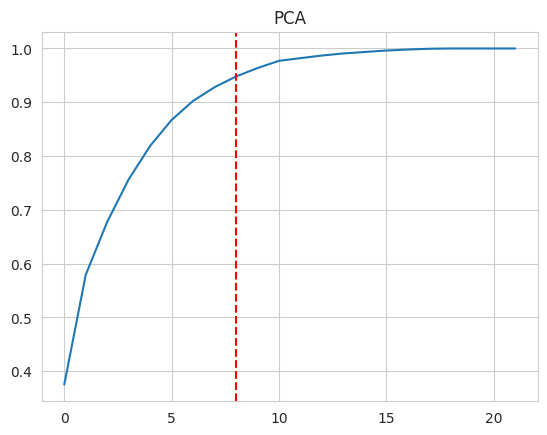

In [38]:
#melakukan PCA dan plot variansi setiap n_components
pca=PCA(whiten=True)
pca.fit(df_pca)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(cumsum)
plt.title('PCA')
plt.axvline(x=8, color='red', linestyle='--')

In [39]:
#mengambil data hasil n_components 95%
pca= PCA(n_components=0.9)
reduced = pca.fit_transform(df_pca)

In [40]:
#melihat jumlah n_components keseluruhan
pca.n_components_

7

In [41]:
#mengambil komponen dari PCA
components = pca.components_

#membuat dataframe dari komponen pca dan nama kolom dataframe awal
components_df = pd.DataFrame(components, columns=df_pca.columns, index=[f"Component_{i}" for i in range(1, components.shape[0]+1)])

components_df

limit_amount       age  utilization_sep  utilization_aug  \
Component_1     -0.085035 -0.015939         0.219778         0.225495   
Component_2      0.269354  0.045384        -0.015085        -0.007500   
Component_3     -0.404367 -0.103480         0.149853         0.178358   
Component_4      0.007680  0.069508         0.068548         0.062451   
Component_5      0.094533  0.207497         0.075253         0.047070   
Component_6     -0.006303  0.964048         0.016970         0.030069   
Component_7     -0.069640  0.040065        -0.093078        -0.076701   

             utilization_jul  utilization_jun  utilization_may  \
Component_1         0.232957         0.244165         0.249385   
Component_2        -0.001708         0.002245         0.008542   
Component_3         0.187045         0.202414         0.209789   
Component_4         0.067973         0.069825         0.063255   
Component_5         0.055205         0.059759         0.065837   
Component_6         0.021604         0.007706        -0.003380   
Component_7         0.004109         0.107601         0.208703   

             utilization_apr  total_payment  total_bill  ...  \
Component_1         0.244279       0.054060    0.328323  ...   
Component_2         0.015710       0.562280    0.289402  ...   
Component_3         0.200353      -0.022632   -0.167787  ...   
Component_4         0.063147      -0.021812    0.089907  ...   
Component_5         0.069031      -0.274083    0.292118  ...   
Component_6        -0.010446       0.008568   -0.095340  ...   
Component_7         0.253305       0.161048   -0.108881  ...   

             consistent_payer  delayed_payments  max_delay  recent_delay  \
Component_1         -0.056991          0.355609   0.050098      0.024141   
Component_2          0.036137         -0.201396  -0.113095     -0.088336   
Component_3          0.066081         -0.341873   0.047510     -0.031587   
Component_4          0.029508         -0.203728   0.171721      0.290605   
Component_5          0.080533         -0.355184  -0.026119     -0.096217   
Component_6         -0.004356          0.072622  -0.003343     -0.001870   
Component_7         -0.029626          0.042531   0.612440      0.336016   

             trend_payment  count_duly_paid  sequential_delay  \
Component_1       0.010608        -0.355609          0.020436   
Component_2      -0.065914         0.201396         -0.024863   
Component_3      -0.109862         0.341873          0.018466   
Component_4       0.840862         0.203728         -0.038253   
Component_5      -0.354486         0.355184          0.032679   
Component_6       0.013531        -0.072622          0.002640   
Component_7      -0.289145        -0.042531          0.218115   

             remaining_balance  recent_bill_to_credit  \
Component_1           0.338123               0.219778   
Component_2           0.219278              -0.015085   
Component_3          -0.174007               0.149853   
Component_4           0.095597               0.068548   
Component_5           0.349478               0.075253   
Component_6          -0.104779               0.016970   
Component_7          -0.138215              -0.093078   

             recent_payment_to_credit  
Component_1                  0.138330  
Component_2                  0.107488  
Component_3                  0.506737  
Component_4                 -0.192747  
Component_5                 -0.387259  
Component_6                  0.187791  
Component_7                 -0.351013  

[7 rows x 22 columns]

In [42]:
#membuat dataframe dari hasil pca n_components 0.9
reduced_data = pd.DataFrame(reduced)

In [43]:
reduced_data

0         1         2         3         4         5         6
0     -1.423272 -1.830005 -0.259104  1.861330 -0.506982 -0.960650 -0.041494
1     -1.394979 -1.238618 -0.384602 -1.994301  0.572401 -0.789921  0.982421
2     -0.256316 -1.125207 -0.620349 -0.587914 -0.294644 -0.062936 -0.279013
3      1.507660 -1.044329  0.612199 -0.226670  0.224644  0.248873 -0.437849
4     -0.680980  1.558734  0.633935 -0.113226 -0.514705  1.700081  0.504852
...         ...       ...       ...       ...       ...       ...       ...
29995  2.053156  1.434389 -0.825092 -0.107789  0.516581  0.094009 -0.840803
29996 -2.722326  0.051395  0.429555  0.187449  0.818697  0.386476 -0.163851
29997 -0.244924 -0.660700 -0.233558  3.808427 -1.802799  0.113430  1.180860
29998  0.465831  2.342192  1.583067  0.897428 -1.742446  0.788889  0.234156
29999  1.487768 -1.020018  0.549546 -0.187325  0.347663  0.932113 -0.504182

[30000 rows x 7 columns]

<Axes: xlabel='0', ylabel='1'>

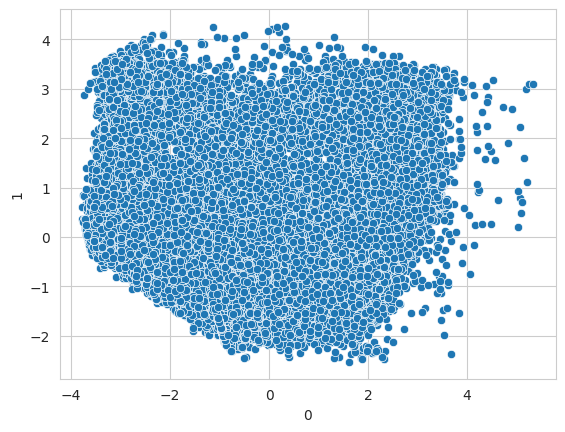

In [44]:
#PCA untuk visualisasi, hanya ambil 2 n_components
pca_viz = PCA(n_components=2)
X_viz = pd.DataFrame(pca_viz.fit_transform(df_pca))
sns.scatterplot(x=X_viz[0],y=X_viz[1])

Pada section di atas, saya menentukan jumlah Principal Components yang dihasilkan oleh PCA dengan mengacu pada 2 cara, yaitu:

* Elbow dari garis hasil jumlah kumulatif nilai variansi rasio
* Dengan menentukan n_components= 0.9 untuk mencari jumlah Principal Components yang menerangkan 90% data.

Berdasarkan kedua cara ini, saya dapat lebih fleksibel untuk menentukan jumlah komponen yang ingin saya ambil sebagai komponen fitur reduced. Pada hasil dari ke dua cara ini, secara konsisten ditemukan bahwa n_components yang sesuai adalah 8 komponen.



#K-means Model

##Elbow Methode

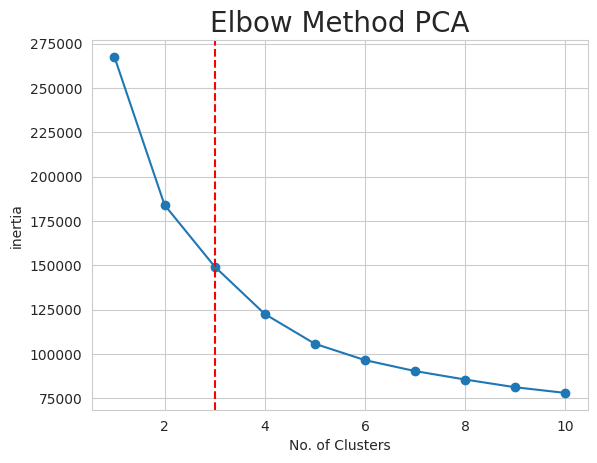

In [45]:
#membuat plot elbow methode dengan pca
inertia = []
#membuat iterasi dari 1-10 untuk nilai k terbaik
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
    km.fit(reduced)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker ="o")
plt.title('Elbow Method PCA', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('inertia')
plt.axvline(x=3, color='red', linestyle='--', label='n_components=4')
plt.show()

Keterangan Parameter pada KMeans:
- Parameter max_iter digunakan untuk mengendalikan jumlah iterasi yang dilakukan oleh algoritma K-means agar mencapai konvergensi. Iterasi ini bertujuan untuk mengoptimalkan posisi pusat kluster (centroid) dan label kluster untuk setiap sampel data. Jika jumlah iterasi mencapai batas max_iter sebelum konvergensi tercapai, algoritma akan berhenti dan menghasilkan solusi terbaik yang ditemukan hingga saat itu.

- Sementara itu, parameter n_init digunakan untuk mengendalikan jumlah inisialisasi yang berbeda yang dilakukan oleh algoritma K-means. Algoritma K-means akan memilih secara acak titik awal pusat kluster dan melakukan iterasi untuk mengoptimalkannya. Dengan meningkatkan nilai n_init, algoritma akan mencoba memulai dengan titik awal yang berbeda secara acak sebanyak mungkin, dan menghasilkan solusi terbaik berdasarkan inisialisasi tersebut. Solusi terbaik di antara semua inisialisasi akan dianggap sebagai solusi akhir yang dikembalikan oleh algoritma. Secara singkat, n_init melakukan inisialisasi ulang sebanyak 10 kali dengan titik awal pusat kluster yang berbeda secara acak.

Pada plot elbow method di atas, untuk kmeans pada data dengan pca, saya mengambil **n_cluster = 3** untuk dijadikan jumlah cluster optimal, karena alasan yang sama.

##Silhouette

In [46]:
#membuat fungsi untuk kebutuhan plot silhouette
def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        centers = clusterer.cluster_centers_

        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.28529814436395184
For n_clusters = 3 The average silhouette_score is : 0.26176628178008154
For n_clusters = 4 The average silhouette_score is : 0.2660882472392639
For n_clusters = 5 The average silhouette_score is : 0.27787197885183473
For n_clusters = 6 The average silhouette_score is : 0.27867130637141285
For n_clusters = 7 The average silhouette_score is : 0.273114061999245
For n_clusters = 8 The average silhouette_score is : 0.23632181091197588
For n_clusters = 9 The average silhouette_score is : 0.22247046315254376
For n_clusters = 10 The average silhouette_score is : 0.22349617600810276


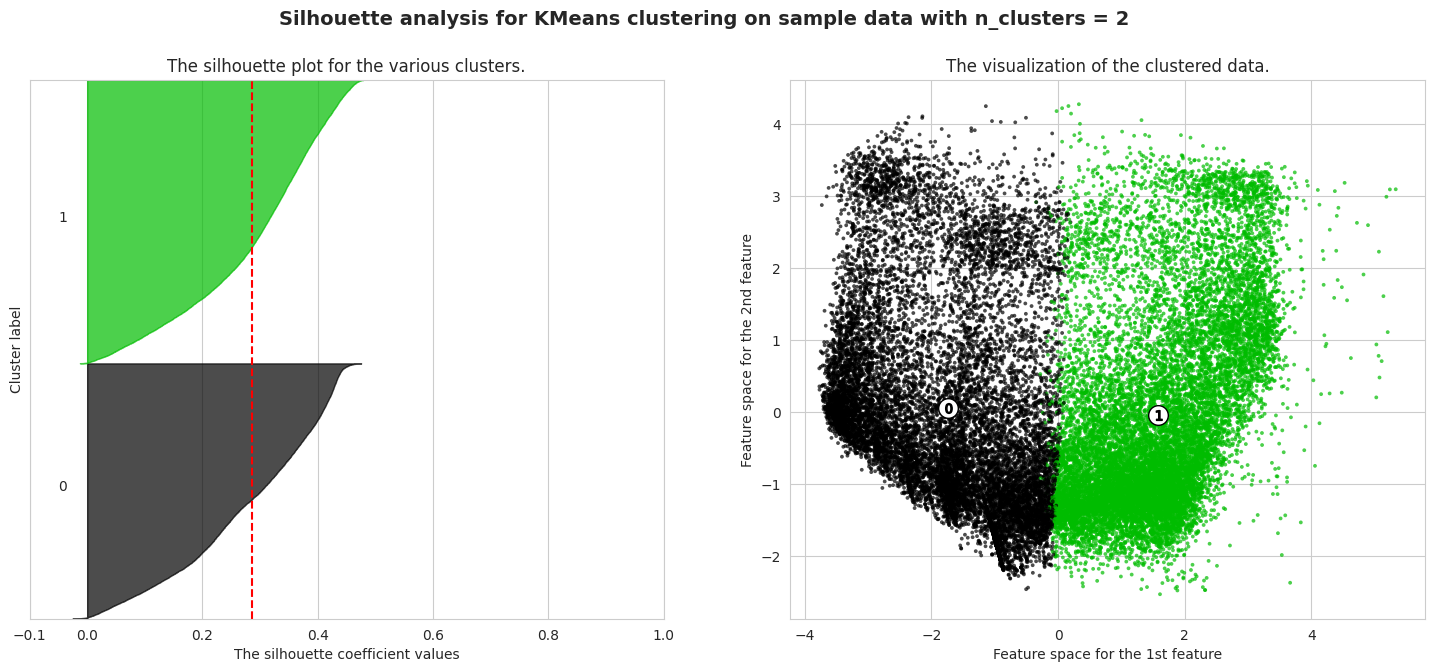

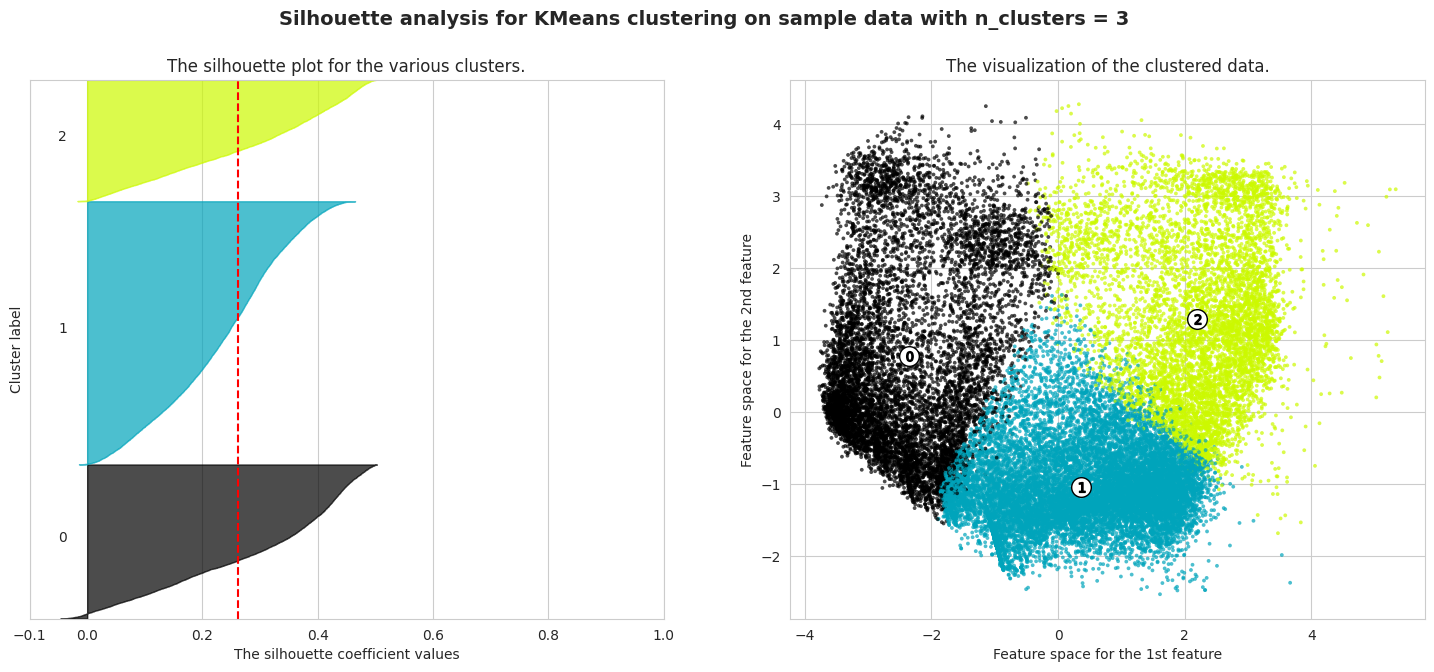

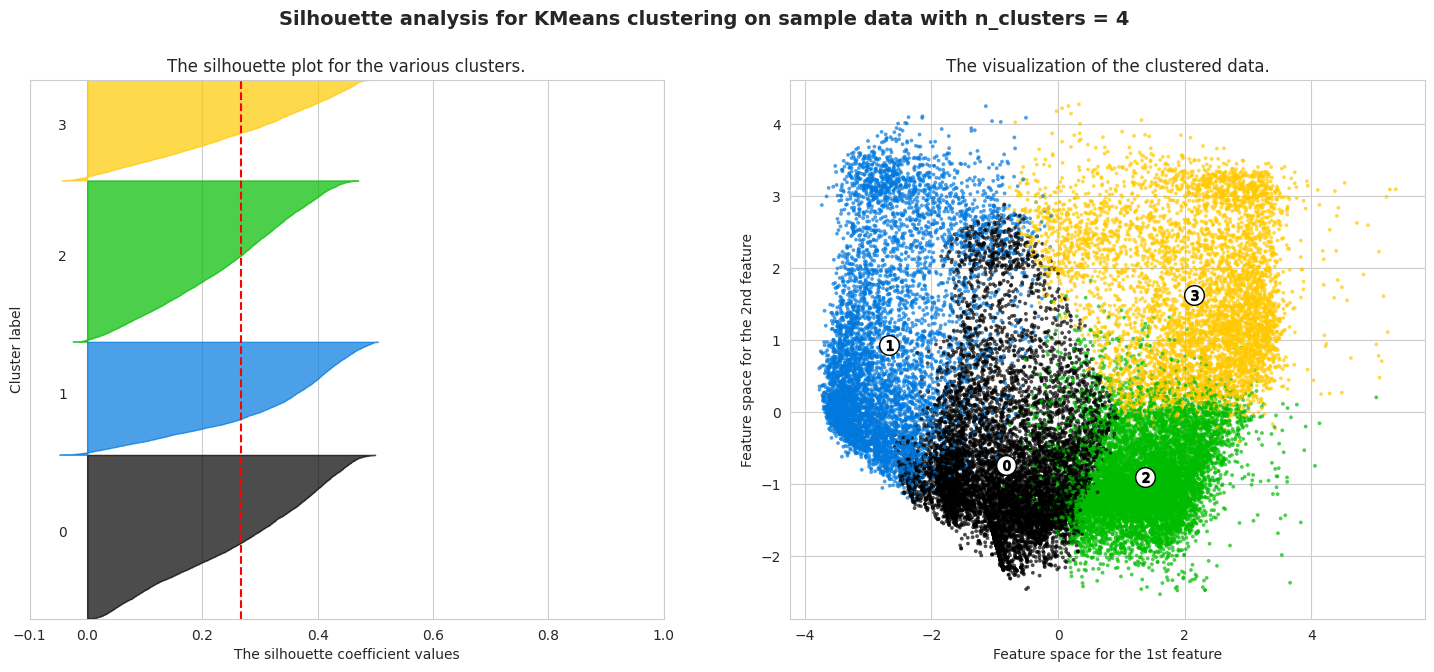

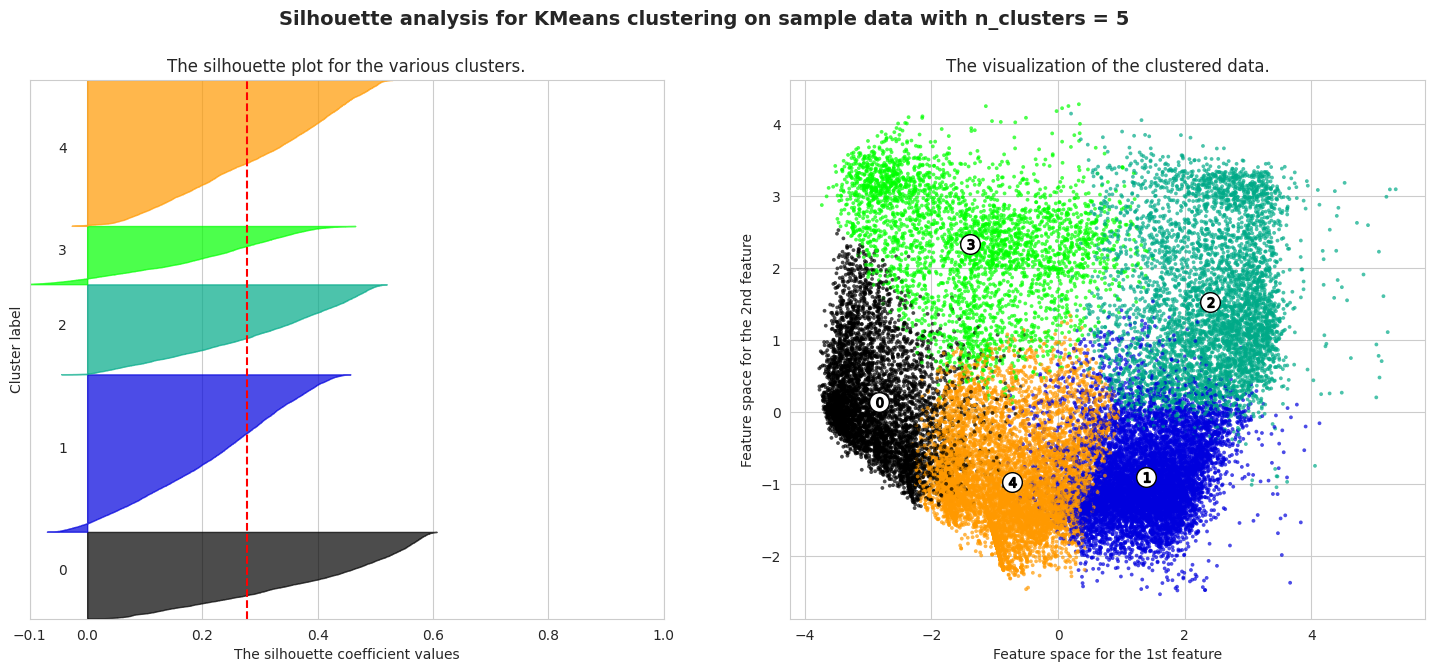

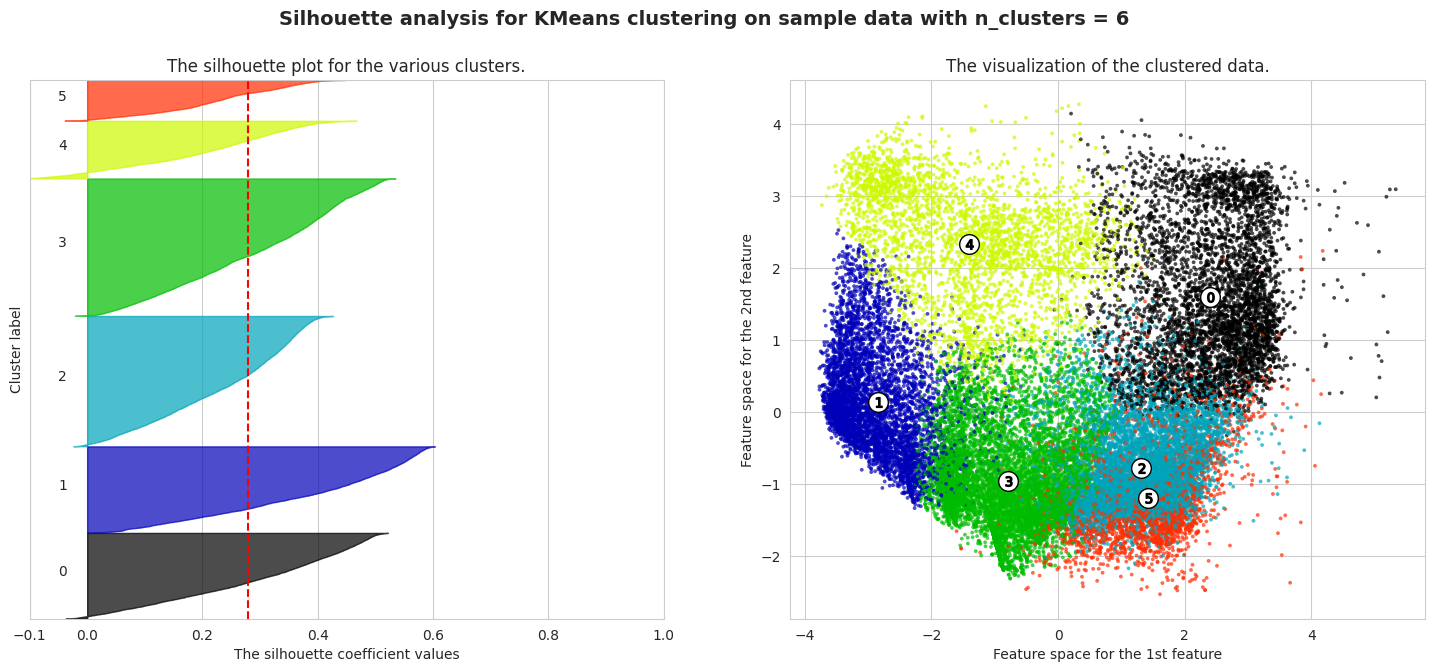

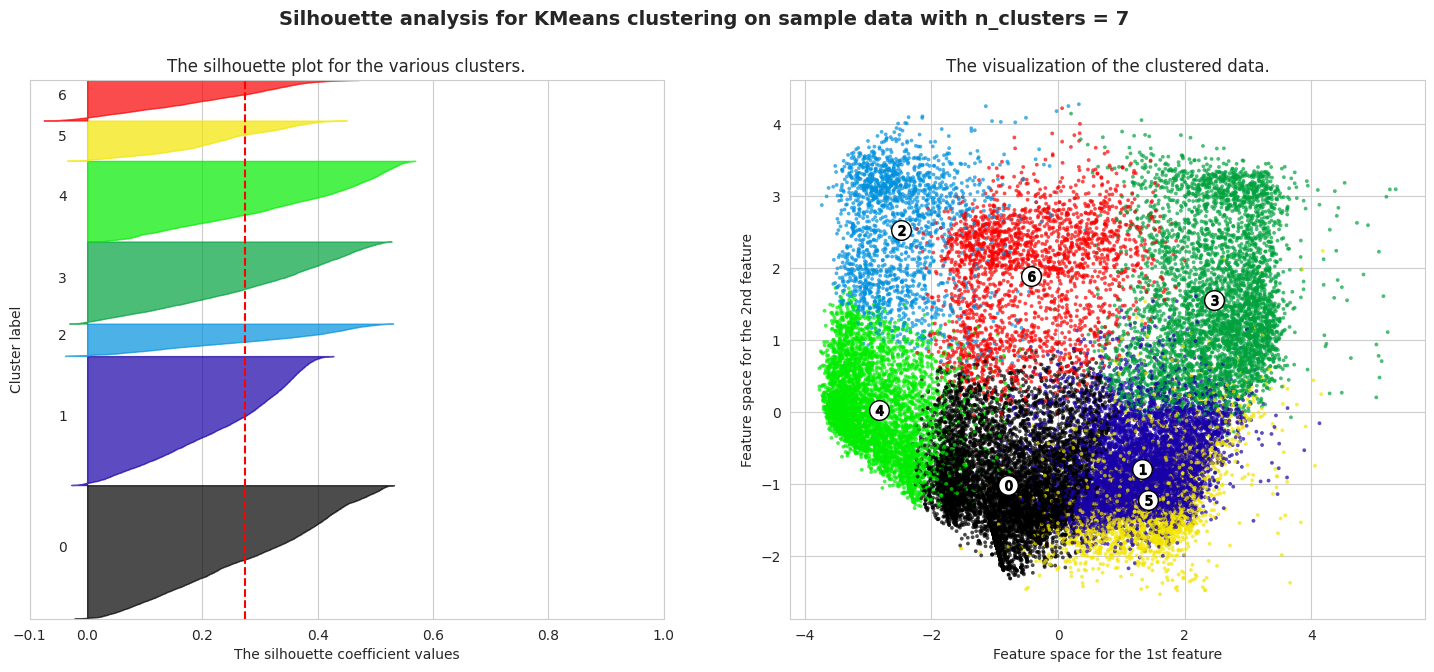

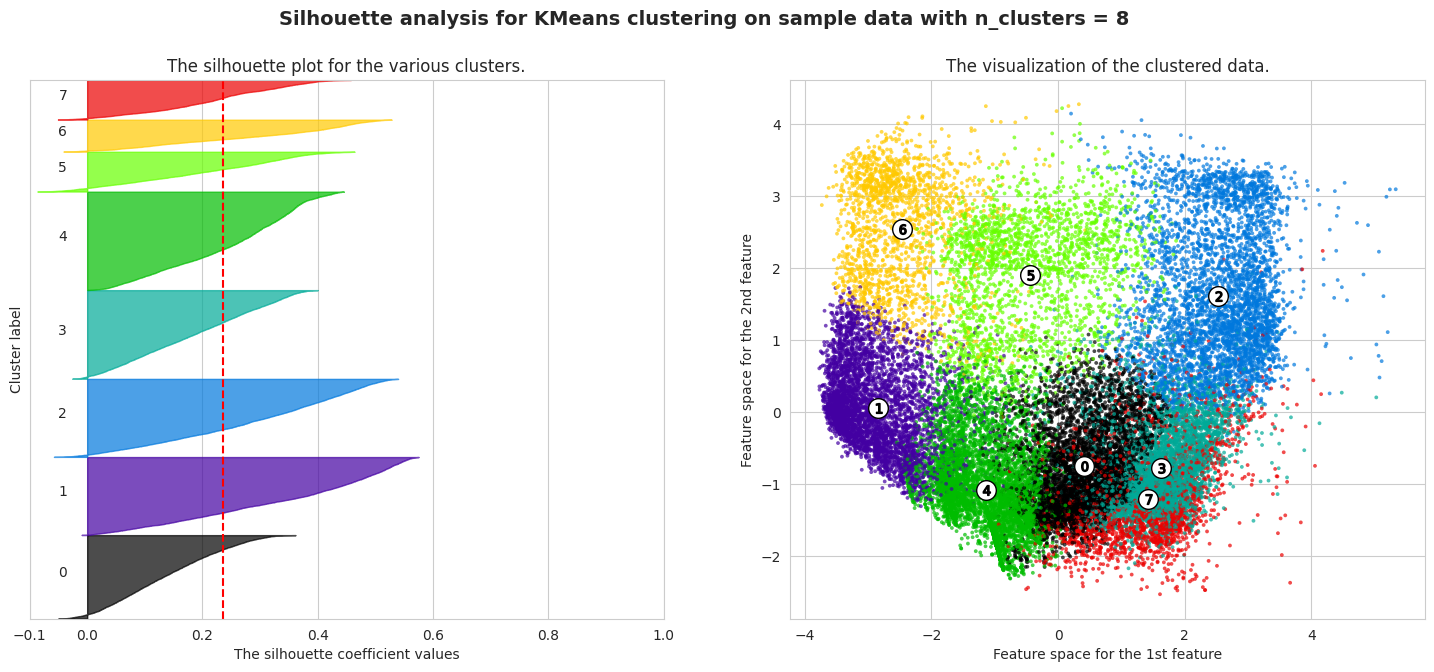

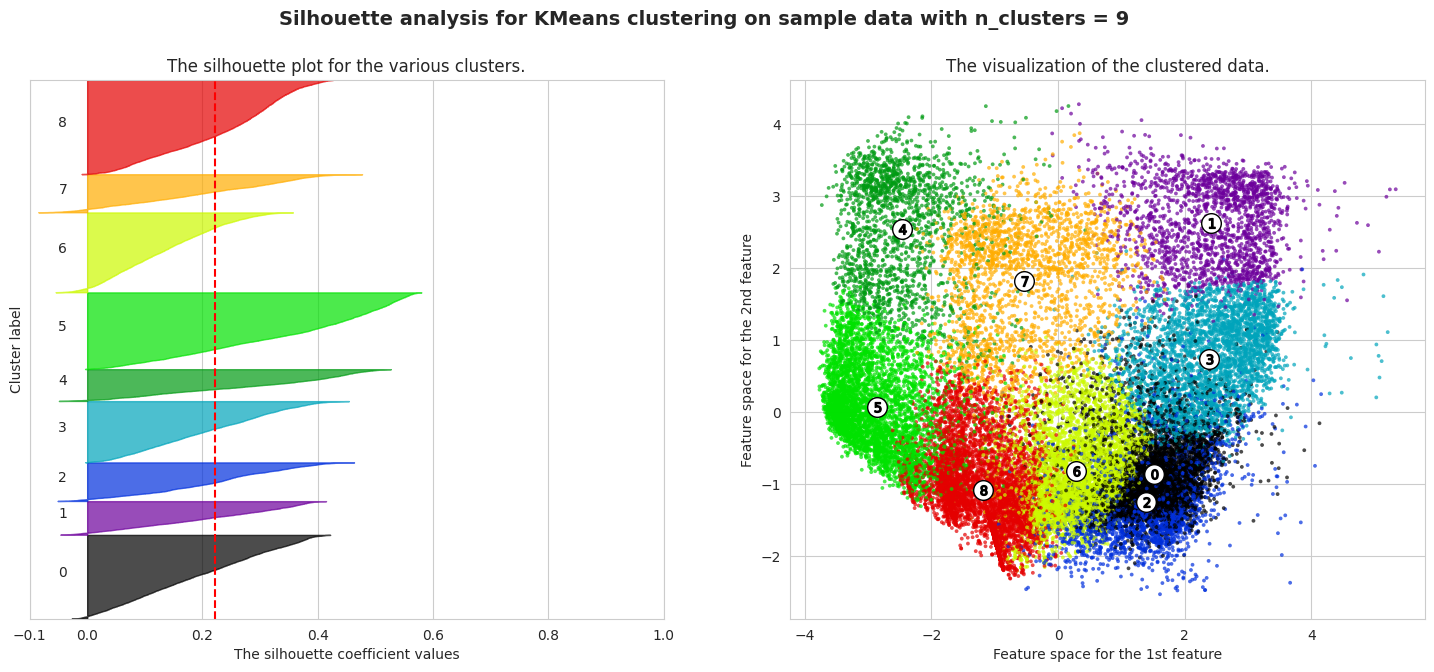

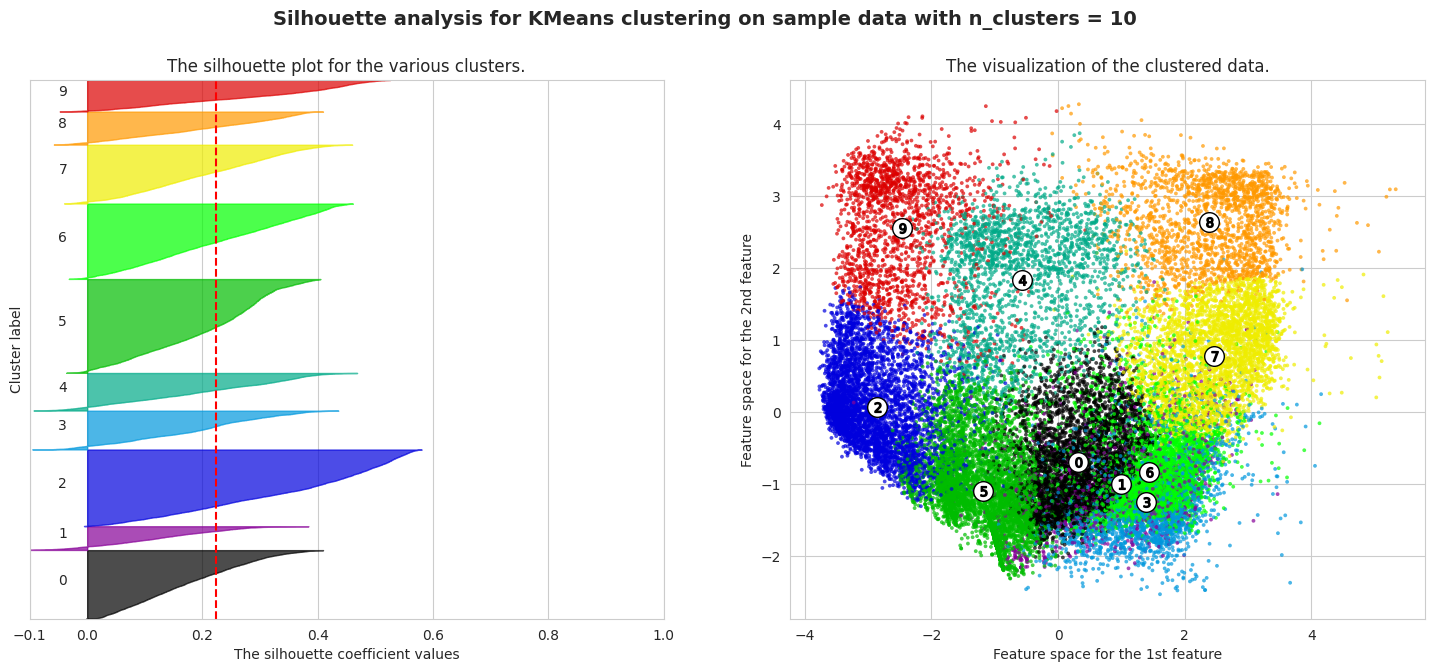

In [47]:
#membuat plot silhouette
K= range(2, 11)
plot_silhouette(K,reduced)

Text(0, 0.5, 'Silhouette Score')

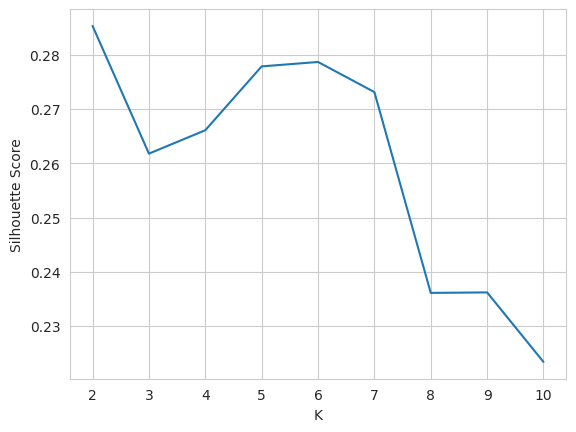

In [48]:
#membuat linechart silhouette tanpa pca
s_score=[silhouette_score(reduced, KMeans(n_clusters=i).fit(reduced).labels_) for i in K]
plt.plot(K,s_score)
plt.xlabel('K')
plt.ylabel('Silhouette Score')

Berikut adalah keterangan untuk plot silhouette di atas;
- 1 : Berarti cluster terpisah satu sama lain dan dibedakan dengan jelas.

- 0 : Berarti cluster tidak berbeda, atau dapat dikatakan jarak antar cluster tidak signifikan.

- -1: Berarti cluster ditugaskan dengan cara yang salah.


Berdasarkan hasil plot silhouette score di atas dan plot line chart dari silhouette score setiap jumlah cluster, berikut adalah kesimpulannya:

Pada data setelah pca, ditemukan bahwa pada line chart score silhouette ditemukan bahwa jumlah cluster 3 memiliki nilai silhouette score cukup tinggi. Begitu juga ketika dilakukan plot silhouette, terlihat bahwa cluster 3 memperlihatkan jumlah cluster terbaik dengan komposisi silhouette yang seimbang yang menjelaskan bahwa jarak antar cluster terpisah satu sama lain dan dapat dibedakan dengan jelas

Sehingga, berdasarkan kesimpulan di atas, saya memilih untuk menggunakan **jumlah cluster 3**.

##Clustering

In [49]:
#melakukan clustering berdasarkan jumlah cluster yang optimal
km_pca = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
label = km_pca.fit_predict(reduced)
label

array([1, 1, 1, ..., 1, 0, 1], dtype=int32)

In [50]:
label.shape

(30000,)

In [51]:
#menambahkan list hasil clustering sebagai isi dari kolom cluster pada df_pca
reduced_data['cluster'] = list(label)
reduced_data

0         1         2         3         4         5         6  \
0     -1.423272 -1.830005 -0.259104  1.861330 -0.506982 -0.960650 -0.041494   
1     -1.394979 -1.238618 -0.384602 -1.994301  0.572401 -0.789921  0.982421   
2     -0.256316 -1.125207 -0.620349 -0.587914 -0.294644 -0.062936 -0.279013   
3      1.507660 -1.044329  0.612199 -0.226670  0.224644  0.248873 -0.437849   
4     -0.680980  1.558734  0.633935 -0.113226 -0.514705  1.700081  0.504852   
...         ...       ...       ...       ...       ...       ...       ...   
29995  2.053156  1.434389 -0.825092 -0.107789  0.516581  0.094009 -0.840803   
29996 -2.722326  0.051395  0.429555  0.187449  0.818697  0.386476 -0.163851   
29997 -0.244924 -0.660700 -0.233558  3.808427 -1.802799  0.113430  1.180860   
29998  0.465831  2.342192  1.583067  0.897428 -1.742446  0.788889  0.234156   
29999  1.487768 -1.020018  0.549546 -0.187325  0.347663  0.932113 -0.504182   

       cluster  
0            1  
1            1  
2            1  
3            1  
4            2  
...        ...  
29995        0  
29996        2  
29997        1  
29998        0  
29999        1  

[30000 rows x 8 columns]

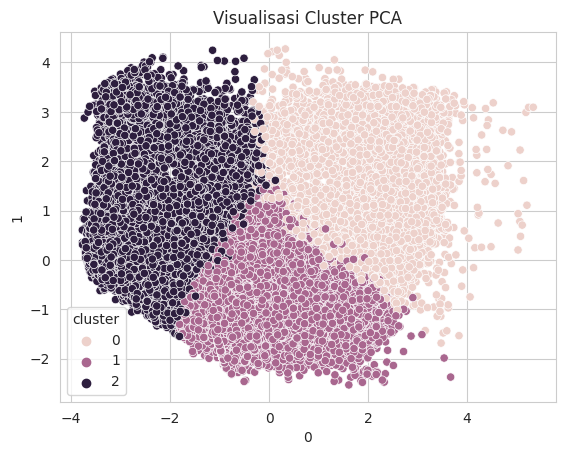

In [52]:
#melakukan plot hasil dari PCA dan clustering
sns.scatterplot(data=reduced_data, x=0, y=1, hue='cluster')
plt.title('Visualisasi Cluster PCA');

#Exploratory Data Analysis (EDA) (Clustered)

In [53]:
#membuat variabel dataframe baru untuk analisa
df_analysis = df_fe.copy()

In [54]:
#menambahkan list hasil clustering sebagai isi dari kolom cluster pada df_analysis
df_analysis['cluster'] = list(label)

In [55]:
#melihat jumlah rata-rata setiap kolom pada setiap cluster
df_analysis.groupby('cluster').mean()

ID   limit_amount        age       bill_sep       bill_aug  \
cluster                                                                         
0        15493.722156  216152.796209  35.989633  149872.711271  146902.539988   
1        14845.656657  109657.817512  34.747833   30831.962943   28555.892309   
2        14877.019314  227835.951134  36.347062   10106.462187    9315.055381   

              bill_jul       bill_jun       bill_may       bill_apr  \
cluster                                                               
0        142054.894180  131656.953347  123022.859153  118280.910989   
1         25927.160923   22977.373848   20855.326520   19781.067904   
2          9941.558813   10030.767888   10009.047818   10649.006632   

             paid_sep  ...  consistent_payer  delayed_payments  max_delay  \
cluster                ...                                                  
0        11805.884479  ...          0.000000          5.852488   0.598786   
1         2215.288678  ...          0.000000          5.826315   0.893059   
2         6717.098080  ...          0.231763          2.381734   0.388249   

         recent_delay  trend_payment  count_duly_paid  sequential_delay  \
cluster                                                                   
0            0.188389       0.121742         0.147512          0.063389   
1            0.295639       0.146796         0.173685          0.091654   
2            0.141245       0.108551         3.618266          0.002443   

         remaining_balance  recent_bill_to_credit  recent_payment_to_credit  
cluster                                                                      
0            750084.525178               0.771265                  0.063063  
1            138477.808469               0.486483                  0.040886  
2             15867.792496               0.059473                  0.038112  

[3 rows x 36 columns]

In [56]:
#melihat nama kolom
df_analysis.columns

Index(['ID', 'limit_amount', 'gender', 'education', 'marital_status', 'age',
       'repay_sep', 'repay_aug', 'repay_jul', 'repay_jun', 'repay_may',
       'repay_apr', 'bill_sep', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may',
       'bill_apr', 'paid_sep', 'paid_aug', 'paid_jul', 'paid_jun', 'paid_may',
       'paid_apr', 'default_payment', 'utilization_sep', 'utilization_aug',
       'utilization_jul', 'utilization_jun', 'utilization_may',
       'utilization_apr', 'total_payment', 'total_bill', 'avg_payment',
       'payment_to_bill_ratio', 'consistent_payer', 'delayed_payments',
       'max_delay', 'recent_delay', 'trend_payment', 'count_duly_paid',
       'sequential_delay', 'remaining_balance', 'recent_bill_to_credit',
       'recent_payment_to_credit', 'cluster'],
      dtype='object')

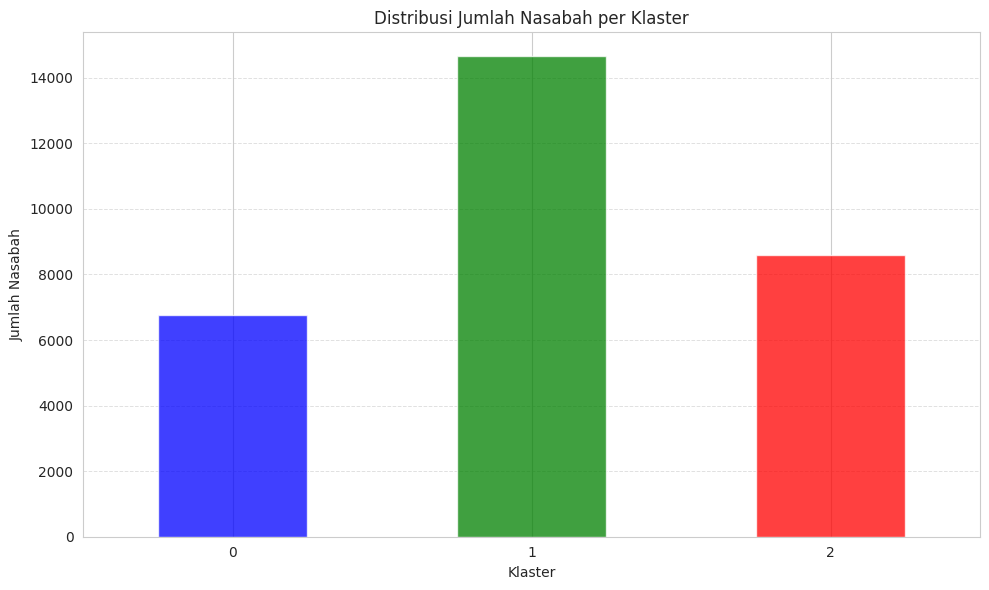

In [57]:
#melakukan plot distribusi cluster dalam dataset
cluster_counts = df_analysis['cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color=['blue', 'green', 'red'], alpha=0.75)
plt.title('Distribusi Jumlah Nasabah per Klaster')
plt.xlabel('Klaster')
plt.ylabel('Jumlah Nasabah')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

plt.tight_layout()
plt.show()


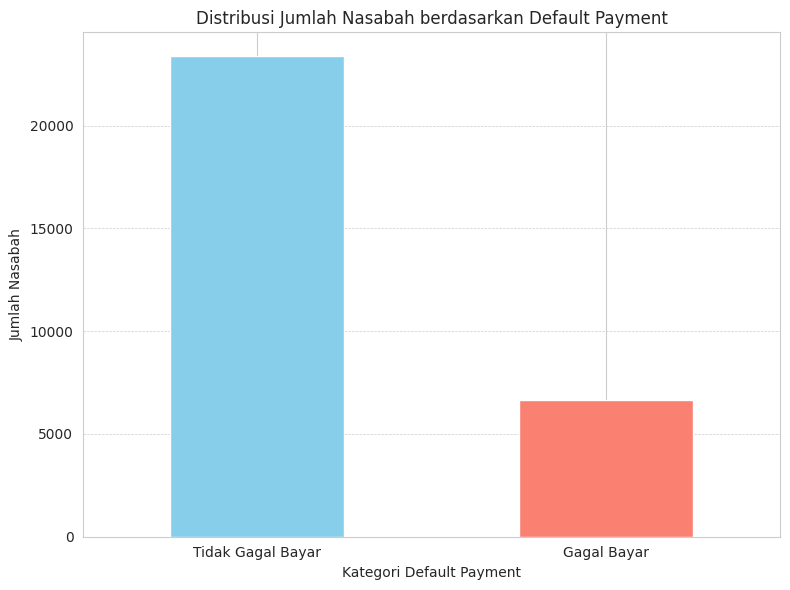

In [58]:
#mengelompokkan data berdasarkan default_payment
default_payment_counts = df_analysis['default_payment'].value_counts()

#plot bar untuk setiap jumlah nasabah berdasarkan default_payment
default_payment_counts.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(8, 6))
plt.title('Distribusi Jumlah Nasabah berdasarkan Default Payment')
plt.ylabel('Jumlah Nasabah')
plt.xlabel('Kategori Default Payment')
plt.xticks([0, 1], ['Tidak Gagal Bayar', 'Gagal Bayar'], rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Berdasarkan plot nasabah yang dikategorikan dari kolom default_payment bisa dilihat bahwa perbandingan dari nasabah yang terindikasi sebagai tidak gagal bayar dan yang terindikasi gagal bayar sangat timpang. Sementara untuk hasil klasterisasi dengan k-means model, hasil pengelompokan menjadi 3 kategori tidak menunjukkan proporsi yang terlalu timpang

## #1. Utilization Ratio

Rasio pemanfaatan, yang sering disebut sebagai "Rasio Pemanfaatan Kredit" atau "Utilization Ratio", adalah ukuran dari seberapa banyak kredit yang digunakan dibandingkan dengan batas kredit. Ini adalah salah satu faktor penting dalam perhitungan skor kredit seseorang.

Mengapa rasio pemanfaatan penting?

* Pengaruh pada Skor Kredit: Rasio pemanfaatan mempengaruhi skor kredit seseorang. Secara umum, rasio pemanfaatan yang lebih rendah dianggap lebih baik. Ini menunjukkan kepada pemberi pinjaman bahwa Anda dapat mengelola kredit dengan bertanggung jawab dan tidak terlalu mengandalkan pinjaman.

* Indikasi Stres Keuangan: Rasio pemanfaatan yang tinggi dapat menunjukkan bahwa seseorang mungkin mengalami kesulitan keuangan atau tingkat utang yang tinggi.

* Kemampuan untuk Mendapatkan Kredit: Rasio pemanfaatan yang lebih rendah dapat meningkatkan kemampuan seseorang untuk mendapatkan pinjaman atau kredit baru dengan kondisi yang lebih baik.

Memantau rasio pemanfaatan dapat membantu untuk memahami risiko potensial yang mungkin terkait dengan pemberian kredit kepada pelanggan tertentu.

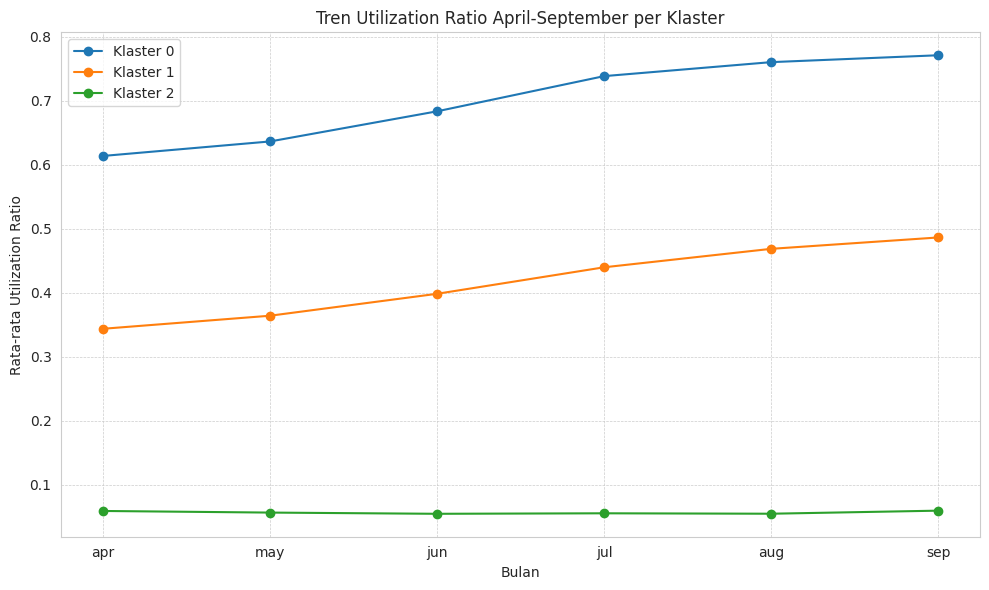

In [59]:
#mengekstrak kolom utilization untuk bulan April hingga September
utilization_columns = [f'utilization_{month}' for month in ['apr', 'may', 'jun', 'jul', 'aug', 'sep']]

#mengelompokkan per klaster dan dapatkan rata-rata penggunaan untuk setiap bulan
utilization_stats_by_month_cluster = df_analysis.groupby('cluster')[utilization_columns].mean()

#plot line chart untuk tren utilization per cluster
plt.figure(figsize=(10, 6))
for cluster in utilization_stats_by_month_cluster.index:
    plt.plot(utilization_stats_by_month_cluster.columns, utilization_stats_by_month_cluster.loc[cluster], label=f'Klaster {cluster}', marker='o')

plt.title("Tren Utilization Ratio April-September per Klaster")
plt.ylabel("Rata-rata Utilization Ratio")
plt.xlabel("Bulan")
plt.xticks(ticks=range(len(utilization_columns)), labels=['apr', 'may', 'jun', 'jul', 'aug', 'sep'])
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Dari visualisasi di atas, dapat diamati tren "Utilization Ratio" dari bulan April hingga September untuk setiap klaster:

Klaster 0:

* Memiliki "Utilization Ratio" tertinggi di antara ketiga klaster di setiap bulan.
* Ada peningkatan konsisten dalam "Utilization Ratio" dari April hingga September.

Klaster 1:

* Memiliki "Utilization Ratio" yang lebih rendah dibandingkan dengan Klaster 0 tetapi lebih tinggi dari Klaster 2.
* Seperti Klaster 0, Klaster 1 juga menunjukkan peningkatan konsisten dalam "Utilization Ratio" dari April hingga September.

Klaster 2:

* Memiliki "Utilization Ratio" terendah di antara ketiga klaster.
* Meskipun ada peningkatan, namun tidak ada peningkatan signifikan, dan "Utilization Ratio" tetap relatif rendah dibandingkan dengan dua klaster lainnya.






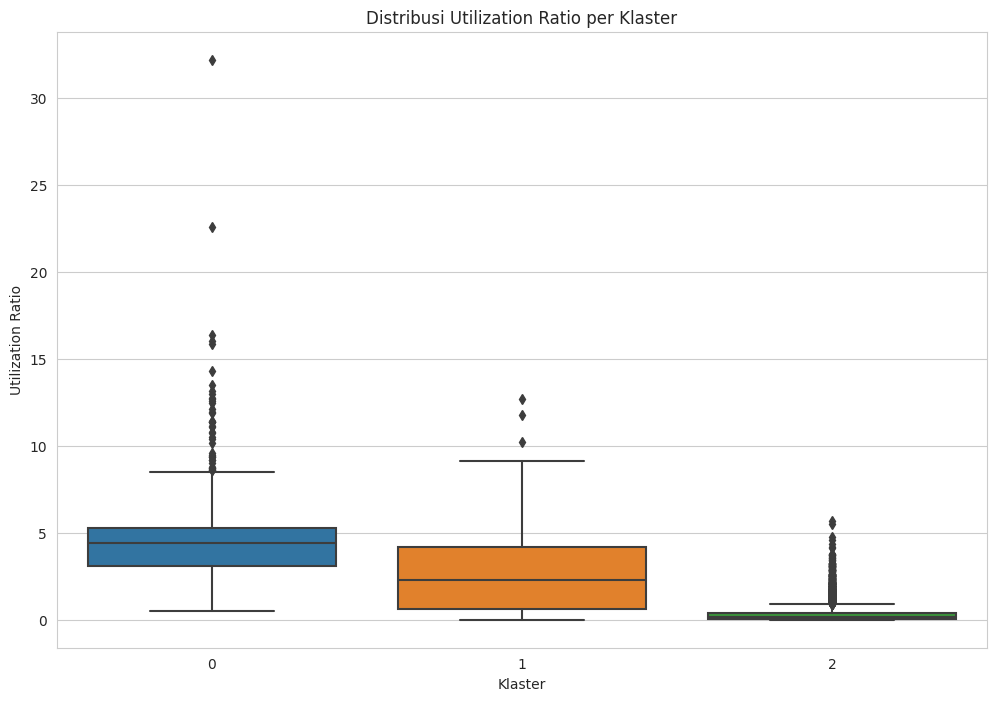

In [60]:
#melihat boxplot utilization_ratio setiap klaster
df_analysis['utilization_ratio'] = df_analysis['total_bill'] / df_analysis['limit_amount']

plt.figure(figsize=(12, 8))
sns.boxplot(x="cluster", y="utilization_ratio", data=df_analysis)
plt.title("Distribusi Utilization Ratio per Klaster")
plt.ylabel("Utilization Ratio")
plt.xlabel("Klaster")
plt.show()


Dari visualisasi boxplot di atas, dapat diamati karakteristik "Utilization Ratio" untuk setiap klaster sebagai berikut:

Klaster 0:

* Mayoritas pelanggan di klaster ini memiliki "Utilization Ratio" yang tinggi, berada di kisaran antara 2,8 hingga 5,1.
* Beberapa pelanggan memiliki "Utilization Ratio" yang sangat tinggi, melebihi 5,1, dengan beberapa bahkan mencapai lebih dari 30.

Klaster 1:

* Distribusi "Utilization Ratio" di klaster ini mirip dengan Klaster 0, namun dengan sedikit variasi yang lebih rendah.
* Mayoritas pelanggan di klaster ini memiliki "Utilization Ratio" antara 2,5 hingga 5.

Klaster 2:

* Klaster ini menonjol dengan "Utilization Ratio" yang sangat rendah dibandingkan dengan dua klaster lainnya.
* Mayoritas pelanggan di klaster ini memiliki "Utilization Ratio" di bawah 0,5, dengan banyak pelanggan yang sangat mendekati 0.


**Kesimpulan**:

1. Klaster 0 dan Klaster 1 terdiri dari pelanggan yang cenderung memanfaatkan sebagian besar dari batas kredit mereka. Ini dapat mengindikasikan bahwa kelompok pelanggan ini mungkin lebih bergantung pada kredit mereka.
2. Klaster 2 terdiri dari pelanggan yang sangat hati-hati dalam menggunakan kredit mereka, dengan sebagian besar memiliki "Utilization Ratio" yang rendah.

Berdasarkan hal ini, dapat dipertimbangkan strategi pemberian kredit yang berbeda untuk setiap klaster, atau bahkan program edukasi keuangan untuk klaster tertentu yang tampaknya bergantung pada kredit mereka.

## #2. Total Payment

Total Payment adalah jumlah total yang dibayar oleh pelanggan selama periode 6 bulan. Di mana dengan mengetahui total payment dapat memberikan informasi sebagai berikut:

* Indikator Kepatuhan: Menggambarkan sejauh mana pelanggan mematuhi kewajiban keuangan mereka. Pembayaran yang tinggi menunjukkan komitmen dan kepatuhan keuangan.

* Risiko: Total pembayaran yang rendah menandakan potensi risiko bagi pemberi kredit karena kemungkinan kesulitan keuangan atau prioritas pembayaran yang rendah oleh pelanggan.

* Penilaian Kredit: Menjadi pertimbangan dalam keputusan pemberian kredit. Pelanggan dengan riwayat pembayaran yang baik dapat mendapatkan persyaratan kredit yang lebih menguntungkan.

* Pendapatan Pemberi Kredit: Sumber pendapatan utama bagi pemberi kredit, penting untuk proyeksi pendapatan dan arus kas.


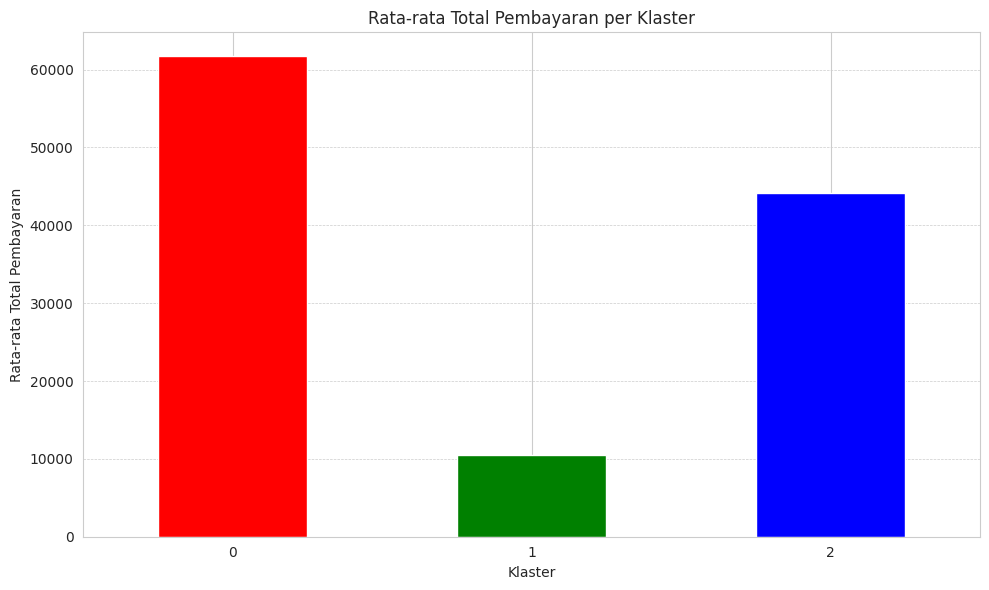

In [61]:
#menghitung rata-rata 'total_payment' per cluster
total_payment_means_by_cluster = df_analysis.groupby('cluster')['total_payment'].mean()

#plot bar chart untuk rata-rata 'total_payment'
plt.figure(figsize=(10, 6))
total_payment_means_by_cluster.plot(kind='bar', color=['red', 'green', 'blue', 'yellow'])

plt.title('Rata-rata Total Pembayaran per Klaster')
plt.xlabel('Klaster')
plt.ylabel('Rata-rata Total Pembayaran')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Berikut adalah visualisasi bar chart yang menunjukkan rata-rata total pembayaran untuk setiap klaster:

* Klaster 0: Klaster ini memiliki rata-rata total pembayaran tertinggi dibandingkan dengan klaster lain, menunjukkan bahwa pelanggan dalam klaster ini cenderung membayar dalam jumlah yang lebih besar selama periode enam bulan.

* Klaster 1: Klaster ini memiliki rata-rata total pembayaran yang paling rendah. Hal ini menunjukkan bahwa pelanggan dalam klaster ini cenderung membayar dalam jumlah yang lebih sedikit.

* Klaster 2: Klaster ini memiliki rata-rata total pembayaran yang berada di antara klaster 0 dan 1.



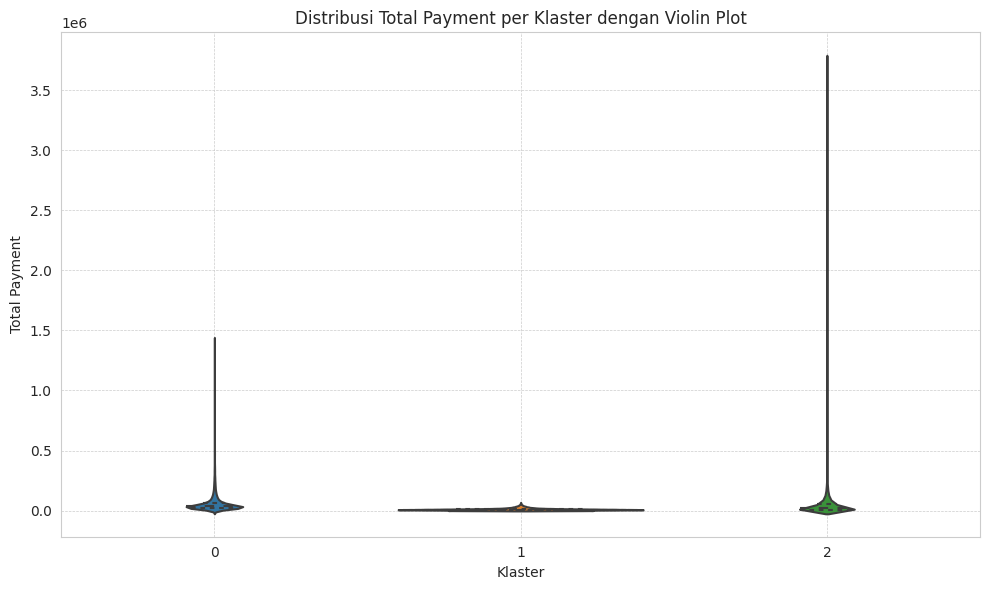

In [62]:
#memvisualisasikan dengan violin plot untuk total_payment setiap klaster
plt.figure(figsize=(10, 6))
sns.violinplot(x="cluster", y="total_payment", data=df_analysis, inner="quartile")

plt.title("Distribusi Total Payment per Klaster dengan Violin Plot")
plt.ylabel("Total Payment")
plt.xlabel("Klaster")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Dari visualisasi violin plot di atas, dapat diamati karakteristik distribusi Total Payment untuk setiap klaster:

Klaster 0:

* Distribusi Total Payment untuk klaster ini memiliki median yang relatif lebih tinggi dibandingkan dengan klaster lain.
* Terdapat beberapa outlier di bagian atas, menunjukkan beberapa pelanggan dengan pembayaran total yang sangat tinggi.
* Rentang interkuartil (IQR) juga lebih lebar dibandingkan dengan klaster lain, menunjukkan variasi pembayaran yang lebih besar di klaster ini.

Klaster 1:

* Klaster ini memiliki median Total Payment yang lebih rendah dibandingkan dengan Klaster 0, tetapi lebih tinggi dari Klaster 2.
* Terdapat beberapa outlier di bagian atas.
* Rentang interkuartil (IQR) klaster ini lebih sempit dibandingkan dengan Klaster 0, menunjukkan variasi pembayaran yang lebih konsisten.

Klaster 2:

* Klaster ini memiliki median Total Payment yang paling rendah di antara ketiga klaster.
* Tidak ada outlier yang terlihat pada klaster ini.
* Rentang interkuartil (IQR) klaster ini adalah yang paling sempit, menunjukkan variasi pembayaran yang sangat konsisten.

**Kesimpulan**:

* Klaster 0 berisi pelanggan dengan pembayaran total yang lebih tinggi dan variasi yang lebih besar dalam pembayaran mereka.
* Klaster 1 berisi pelanggan dengan pembayaran total yang moderat dan variasi pembayaran yang lebih konsisten.
* Klaster 2 berisi pelanggan dengan pembayaran total yang lebih rendah dan variasi pembayaran yang paling konsisten.
Informasi ini dapat membantu institusi kredit memahami bagaimana perilaku pembayaran pelanggan bervariasi antar klaster dan dapat digunakan untuk merancang strategi atau intervensi yang sesuai.

Pengaruh variasi pembayaran:

"Variasi pembayaran besar" di atas adalah fluktuasi signifikan dalam jumlah yang dibayar oleh pelanggan dari satu bulan ke bulan lain. Di mana dalam hal ini, berikut adalah implikasinya pada bisnis:

1. **Ketidakpastian Pendapatan**: Variasi pembayaran dapat menyebabkan kesulitan dalam meramalkan pendapatan.
  
2. **Risiko Kredit**: Pelanggan yang menunjukkan variasi pembayaran mungkin memiliki risiko kredit yang lebih tinggi karena potensi kesulitan keuangan atau keengganan untuk membayar.
  
3. **Biaya Operasional**: Variasi pembayaran mungkin memerlukan upaya pengelolaan kredit dan penagihan yang lebih intensif.
  
4. **Kesempatan Bisnis**: Variasi pembayaran dapat menjadi peluang untuk menawarkan solusi pembayaran yang lebih fleksibel kepada pelanggan.
  
5. **Hubungan dengan Pelanggan**: Komunikasi yang intensif mungkin diperlukan untuk memahami dan mengatasi variasi pembayaran.

Dalam konteks bisnis pemberian kredit, memahami variasi pembayaran adalah kunci untuk mengelola risiko, dan membangun hubungan dengan pelanggan untuk mendapat informasi indikasi potensi kesulitan keuangan atau keengganan untuk membayar.

## #3. Total Bill

Kolom total_bill ini menggambarkan jumlah total tagihan yang diterima oleh pelanggan selama periode 6 bulan. Ini mencerminkan total dari semua transaksi yang dilakukan oleh pelanggan, termasuk pembelian, biaya, bunga, dan lainnya, yang belum dibayar oleh pelanggan dalam periode waktu tersebut.

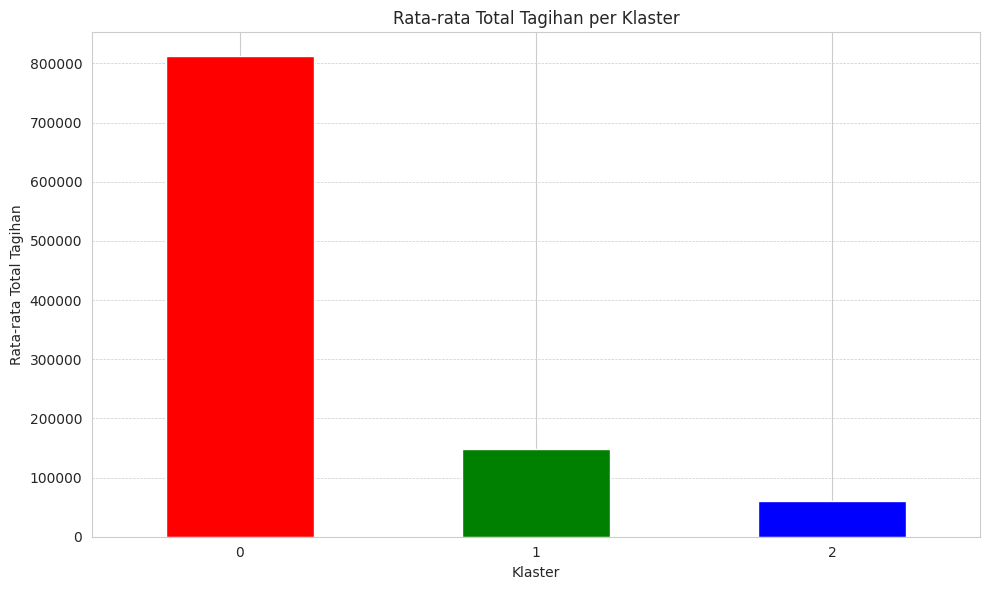

In [63]:
#menghitung rata-rata 'total_bill' per cluster
total_bill_means_by_cluster = df_analysis.groupby('cluster')['total_bill'].mean()

#plot bar untuk total_bill setiap klaster
plt.figure(figsize=(10, 6))
total_bill_means_by_cluster.plot(kind='bar', color=['red', 'green', 'blue'])

plt.title('Rata-rata Total Tagihan per Klaster')
plt.xlabel('Klaster')
plt.ylabel('Rata-rata Total Tagihan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Berikut adalah visualisasi bar chart yang menunjukkan rata-rata total tagihan untuk setiap klaster:

* Klaster 0: Klaster ini memiliki rata-rata total tagihan yang paling rendah dibandingkan dengan klaster lain. Ini menunjukkan bahwa, meskipun pelanggan di klaster ini memiliki rata-rata total pembayaran yang tinggi (seperti yang kita lihat sebelumnya), beban hutang mereka relatif lebih rendah.

* Klaster 1: Klaster ini memiliki rata-rata total tagihan tertinggi. Hal ini menunjukkan bahwa pelanggan di klaster ini memiliki beban hutang yang paling tinggi selama periode enam bulan.

* Klaster 2: Klaster ini memiliki rata-rata total tagihan yang berada di antara klaster 0 dan 1.



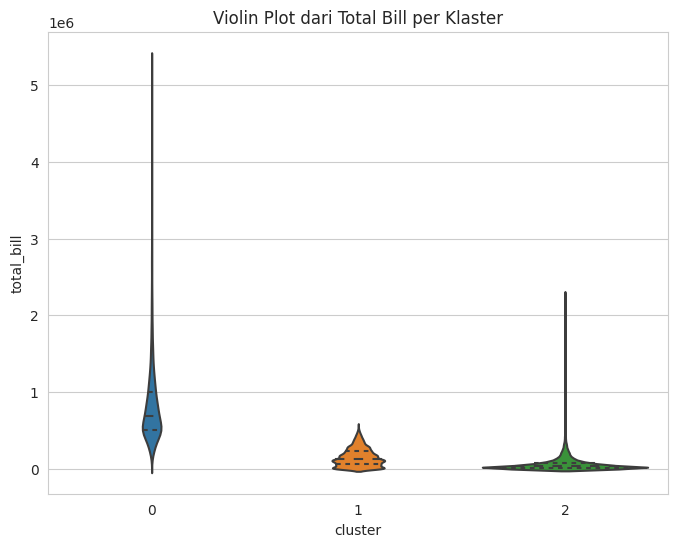

In [64]:
#memvisualisasikan dengan violin plot untuk total_bill setiap klaster
plt.figure(figsize=(8, 6))
sns.violinplot(x="cluster", y="total_bill", data=df_analysis, inner="quartile")
plt.title("Violin Plot dari Total Bill per Klaster")
plt.show()


Berikut adalah penjelasan dari violin plot di atas:

* Klaster 0: Distribusi tagihan cenderung lebih tinggi dengan median di sekitar 750,000 dan beberapa outliers di atas 2,000,000. Ini menunjukkan bahwa klaster ini terdiri dari pelanggan dengan tagihan yang cenderung lebih tinggi dibandingkan klaster lain.

* Klaster 1: Distribusi tagihan lebih moderat dengan median di sekitar 178,000. Beberapa outliers terdeteksi di atas 1,000,000, tetapi mereka lebih sedikit dibandingkan dengan klaster 0.

* Klaster 2: Sebagian besar pelanggan memiliki tagihan yang rendah, dengan median hanya sekitar 33,734. Ada beberapa outliers dengan tagihan yang lebih tinggi, tetapi mereka merupakan minoritas.

**Kesimpulan**:

* Klaster 0: Pelanggan dengan tagihan lebih tinggi, mungkin merupakan pelanggan premium atau mereka yang menggunakan kredit dengan intensitas tinggi.
* Klaster 1: Pelanggan dengan tagihan moderat, mungkin merupakan pelanggan dengan kebutuhan kredit yang sedang.
* Klaster 2: Pelanggan dengan tagihan rendah, mungkin merupakan pelanggan yang jarang menggunakan kredit atau baru mulai menggunakan fasilitas kredit.


## #4. Trend Payment & Bill

Berdasarkan dataset yang saya miliki, terdapat kolom-kolom payment dan bill yang dicatat dari histori per bulan setiap nasabah. Dengan demikian saya melakukan analisa terkait trend perubahan pembayaran dan tagihan setiap kluster. Hal ini dapat memiliki manfaat-manfaat sebagai berikut:

Tren Pembayaran (trend_payment):
* Mengungkapkan bagaimana perilaku pembayaran pelanggan berubah, memungkinkan identifikasi risiko yang lebih baik.
* Membantu dalam personalisasi layanan, memastikan komunikasi yang tepat dengan pelanggan.
* Menyoroti perubahan dalam kepatuhan pelanggan, mendorong perusahaan untuk menyesuaikan produk dan strategi mereka.

Tren Tagihan (trend_bill):
* Menunjukkan fluktuasi dalam beban hutang pelanggan, memberikan gambaran tentang perilaku penggunaan kredit.
* Berfungsi sebagai alat prediksi untuk meramalkan penerimaan masa depan.
* Mengidentifikasi potensi risiko atau peluang berdasarkan perbandingan antara penggunaan kredit dengan pembayaran yang dilakukan.

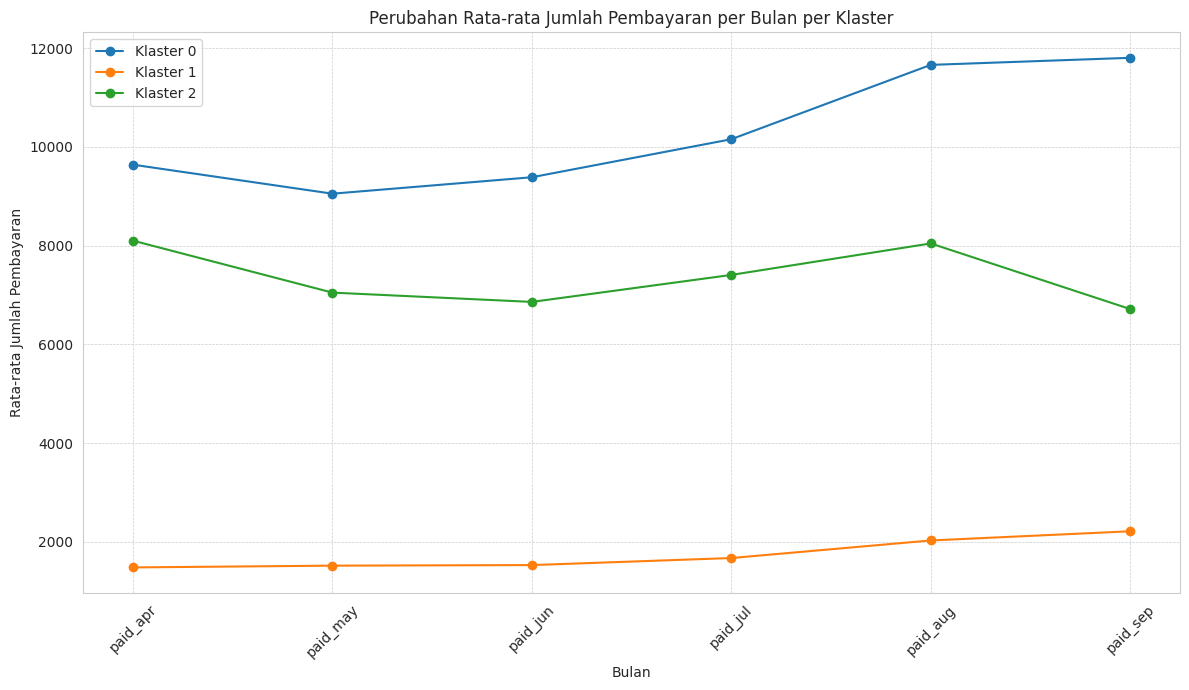

In [65]:
#membuat line plot untuk melihat tren pembayaran setiap klaster
months = ['paid_apr', 'paid_may', 'paid_jun', 'paid_jul', 'paid_aug', 'paid_sep']

paid_means_months = df_analysis.groupby('cluster')[months].mean()

plt.figure(figsize=(12, 7))

for cluster in paid_means_months.index:
    plt.plot(paid_means_months.columns, paid_means_months.loc[cluster], marker='o', label=f'Klaster {cluster}')

plt.title('Perubahan Rata-rata Jumlah Pembayaran per Bulan per Klaster')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Pembayaran')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


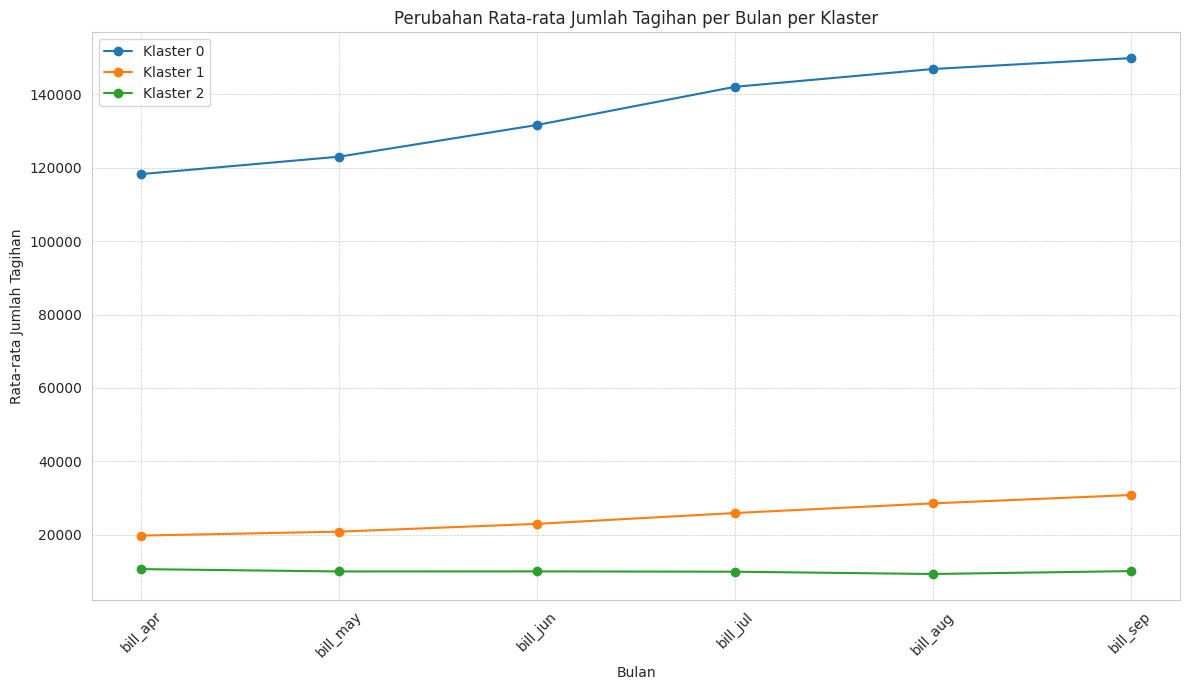

In [66]:
#melakukan plot line chart untuk melihat tren tagihan setiap bulan per klaster
bill_month = [col for col in df_analysis.columns if 'bill_' in col and col != 'bill_total']
bill_order = ['bill_apr', 'bill_may', 'bill_jun', 'bill_jul', 'bill_aug', 'bill_sep']
bill_means_month = df_analysis.groupby('cluster')[bill_order].mean()

plt.figure(figsize=(12, 7))

for cluster in bill_means_month.index:
    plt.plot(bill_means_month.columns, bill_means_month.loc[cluster], marker='o', label=f'Klaster {cluster}')

plt.title('Perubahan Rata-rata Jumlah Tagihan per Bulan per Klaster')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Tagihan')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


Saya melakukan plot line chart untuk melihat trend perubahan pembayaran dan tagihan setiap klaster, berikut adalah hasil pengamatan saya:

Klaster 0:

* Pembayaran:
Klaster 0 menunjukkan tren pembayaran yang relatif stabil dengan sedikit peningkatan dari bulan ke bulan.
* Tagihan:
Untuk klaster ini, jumlah tagihan menurun dari April hingga Juni, kemudian stabil dari Juni hingga September.
Jika kita membandingkan tren pembayaran dan tagihan, tampak bahwa pembayaran relatif konsisten meskipun tagihan menurun, yang mengindikasikan bahwa kelompok ini berupaya memenuhi kewajiban pembayarannya meskipun beban hutang mereka menurun.

Klaster 1:

* Pembayaran:
Ada peningkatan signifikan dalam pembayaran dari April hingga Juni, kemudian tetap stabil hingga September.
* Tagihan:
Tagihan juga menunjukkan peningkatan dari April hingga Juni, kemudian sedikit menurun hingga September.
Tren pembayaran dan tagihan mirip, dengan pembayaran yang meningkat seiring dengan peningkatan tagihan. Hal ini menunjukkan bahwa kelompok ini cenderung membayar lebih banyak saat tagihan mereka meningkat.

Klaster 2:

* Pembayaran:
Klaster 2 memiliki pembayaran yang paling konsisten dan tinggi di antara semua klaster, dengan sedikit peningkatan dan penurunan dari bulan ke bulan. Hal ini dapat disebut juga dengan trend sideways pembayaran
* Tagihan:
Jumlah tagihan untuk klaster ini juga meningkat secara konsisten dari bulan ke bulan, namun tidak terlalu signifikan, yang juga dapat disebut trend sideways.

**Karakteristik dan Kesimpulan**

**Klaster 0**

* Konsumen Aktif dengan Perilaku Pembelian yang Berfluktuasi: Fluktuasi dalam pembayaran menunjukkan bahwa pelanggan di klaster ini mungkin memiliki pola pembelian yang tidak tetap. Ini bisa disebabkan oleh berbagai alasan, seperti pembelian musiman, promosi atau diskon tertentu, atau kebutuhan mendadak.

* Komitmen untuk Membayar Hutang: Meskipun ada fluktuasi dalam jumlah yang mereka bayar setiap bulan, tren meningkat dalam pembayaran menunjukkan komitmen untuk membayar hutang mereka. Mereka mungkin mengalami beberapa kesulitan keuangan dalam beberapa bulan, tetapi dalam jangka panjang, mereka mencoba untuk melunasi hutang mereka.

* Kenaikan Beban Hutang yang Konsisten: Kenaikan yang rapi dan konsisten dalam tagihan menunjukkan bahwa pelanggan ini secara teratur menambah beban hutang mereka. Hal ini bisa disebabkan oleh kepercayaan diri dalam kemampuan mereka untuk membayar kembali atau mungkin mereka memanfaatkan kredit sebagai alat keuangan utama mereka.

* Keseimbangan Antara Pengeluaran dan Kemampuan Membayar: Meskipun ada gap antara tagihan dan pembayaran, fakta bahwa kedua tren tersebut meningkat menunjukkan adanya upaya untuk menjaga keseimbangan antara pengeluaran dan kemampuan membayar.

* Risiko Potensial: Bagi pemberi kredit, pelanggan seperti ini menghadirkan sebuah dilema. Di satu sisi, mereka adalah konsumen aktif yang secara rutin menggunakan fasilitas kredit yang diberikan. Namun, akumulasi hutang yang terus meningkat dapat meningkatkan risiko gagal bayar di masa depan.

* Peluang Bisnis: Dari perspektif bisnis, pelanggan ini mungkin merupakan target yang baik untuk penawaran khusus atau promosi, mengingat aktivitas pembelian mereka yang tinggi. Namun, komunikasi tentang pengelolaan hutang dan keuangan pribadi mungkin juga bermanfaat bagi mereka.

Dapat disimpulkan bahwa  karakteristik Klaster 1 menunjukkan sekelompok pelanggan yang aktif secara finansial tetapi mungkin memerlukan bimbingan atau alat tambahan untuk mengelola hutang mereka dengan lebih efektif. Untuk keuntungan bisnis, pendekatan yang seimbang antara pemberian fasilitas dan pendidikan keuangan mungkin menjadi strategi yang efektif untuk kelompok ini.



**Klaster 1**

Klaster 1 menunjukkan perilaku yang menarik: meskipun ada tren kenaikan untuk baik total tagihan maupun pembayaran, jumlah tagihan tetap lebih tinggi daripada pembayaran. Ini menunjukkan beberapa karakteristik dan dinamika penting:

* Peningkatan Konsumsi: Pelanggan dalam klaster ini tampaknya meningkatkan pengeluaran mereka dari waktu ke waktu. Ini bisa disebabkan oleh berbagai alasan seperti peningkatan pendapatan, perubahan gaya hidup, atau kebutuhan mendadak.

* Komitmen Membayar: Meskipun tagihan mereka meningkat, fakta bahwa pembayaran mereka juga meningkat menunjukkan komitmen untuk memenuhi kewajiban keuangan mereka. Namun, karena pembayaran tidak mengimbangi kenaikan tagihan, ini menunjukkan adanya kesenjangan.

* Akumulasi Hutang: Karena tagihan mereka terus meningkat namun tidak sepenuhnya dilunasi setiap bulan, pelanggan dalam klaster ini mungkin mengakumulasi hutang. Ini bisa menjadi perhatian bagi pemberi kredit karena menunjukkan potensi risiko kredit yang meningkat di masa depan.

* Potensi Kesulitan Keuangan: Meskipun pelanggan ini menunjukkan kemauan untuk membayar, gap antara tagihan dan pembayaran menunjukkan bahwa mereka mungkin mengalami kesulitan keuangan. Mereka mungkin mencoba menjaga keseimbangan antara pengeluaran dan pembayaran, tetapi belum mampu melunasi tagihan sepenuhnya.

* Pemberi Kredit Harus Berhati-hati: Dengan melihat trend ini, pemberi kredit harus berhati-hati sebelum meningkatkan limit kredit atau memberikan penawaran lainnya kepada pelanggan ini. Mereka mungkin juga ingin mempertimbangkan pendekatan komunikasi proaktif untuk membantu pelanggan mengelola keuangan mereka dengan lebih baik.

* Oportunis: Dari sisi positif, meningkatnya pengeluaran dapat menunjukkan pelanggan yang oportunis, memanfaatkan penawaran atau membeli barang-barang yang mereka anggap bernilai. Namun, ini harus dibandingkan dengan kemampuan mereka untuk membayar.

Dengan karakteristik tersebut, meskipun mereka menunjukkan potensi sebagai konsumen yang aktif dan berkomitmen, mereka juga membawa risiko tertentu yang perlu dikelola dengan hati-hati oleh pemberi kredit.

**Klaster 2**

Pada penjelasan di atas, saya menyebutkan trend "sideways" dalam analisis, itu berarti ada sedikit perubahan yang signifikan dalam variabel yang diamati selama periode waktu tertentu. Dalam konteks klaster 2, hal ini menunjukkan bahwa total tagihan dan pembayaran tetap relatif konstan dari bulan ke bulan selama periode observasi.

Berikut adalah interpretasi karakteristik klaster 2 yang cenderung "sideways" tersebut:

* Stabilitas Keuangan: Pelanggan dalam klaster ini mungkin memiliki sumber pendapatan yang stabil dan kebiasaan belanja yang konsisten. Mereka mungkin tidak membuat pembelian besar atau mendadak yang akan menyebabkan lonjakan signifikan dalam total tagihan mereka.

* Kepatuhan Pembayaran: Meskipun mereka memiliki pembayaran yang menurun seiring waktu, fakta bahwa total pembayaran tetap relatif konstan menunjukkan bahwa pelanggan ini tetap memenuhi kewajiban keuangan mereka, meskipun mungkin tidak selalu membayar penuh.

* Risiko Rendah Gagal Bayar: Stabilitas dalam total tagihan dan pembayaran menunjukkan bahwa pelanggan dalam klaster ini memiliki risiko gagal bayar yang relatif rendah dalam jangka pendek. Namun, pemberi kredit harus tetap waspada terhadap potensi perubahan dalam perilaku pembayaran di masa depan.

* Manajemen Keuangan yang Baik: Pelanggan mungkin mengelola keuangan mereka dengan baik, sehingga mereka mampu menjaga keseimbangan antara pengeluaran dan pembayaran mereka.

* Target untuk Penawaran Kredit: Mengingat stabilitas mereka, pelanggan dalam klaster ini bisa menjadi target yang baik untuk penawaran kredit tambahan atau promosi, asalkan pemberi kredit memastikan bahwa peningkatan limit atau penawaran tambahan tidak akan mengganggu keseimbangan keuangan pelanggan.

Dalam konteks bisnis, pada perspektif bisnis tertentu, kelompok pelanggan ini mungkin lebih dapat diandalkan karena dari segi pembayaran dan tagihan yang stabil, sehingga memiliki risiko kredit yang lebih rendah.

## #5. Duly Payer

Konsistensi dalam pembayaran adalah indikator penting dari perilaku keuangan pelanggan. Dalam hal ini, saya memberikan perhatian khusus pada nasabah yang melakukan pembayaran tepat waktu yang konsisten. Di mana pelanggan yang konsisten ini cenderung lebih dapat diandalkan dari segi pembayaran dan mungkin menunjukkan risiko kredit yang lebih rendah bagi pemberi kredit.

In [67]:
#melihat baris yang memiliki consistent_payer 1 (yang memiliki 6 bulan berturut-turut bayar tepat waktu)
df_analysis[df_analysis['consistent_payer'] == 1]

ID  limit_amount  gender        education marital_status  age  \
21        22        120000  female       university        married   39   
28        29         50000  female      high school        married   47   
30        31        230000  female  graduate school         single   27   
48        49        380000    male       university         single   32   
70        71         80000    male  graduate school         single   31   
...      ...           ...     ...              ...            ...  ...   
29893  29894        300000    male  graduate school        married   46   
29894  29895        210000    male       university        married   45   
29923  29924        360000    male  graduate school         single   35   
29934  29935        360000    male       university        married   45   
29942  29943        130000    male      high school        married   45   

      repay_sep repay_aug repay_jul repay_jun  ... max_delay recent_delay  \
21     pay_duly  pay_duly  pay_duly  pay_duly  ...         0            0   
28     pay_duly  pay_duly  pay_duly  pay_duly  ...         0            0   
30     pay_duly  pay_duly  pay_duly  pay_duly  ...         0            0   
48     pay_duly  pay_duly  pay_duly  pay_duly  ...         0            0   
70     pay_duly  pay_duly  pay_duly  pay_duly  ...         0            0   
...         ...       ...       ...       ...  ...       ...          ...   
29893  pay_duly  pay_duly  pay_duly  pay_duly  ...         0            0   
29894  pay_duly  pay_duly  pay_duly  pay_duly  ...         0            0   
29923  pay_duly  pay_duly  pay_duly  pay_duly  ...         0            0   
29934  pay_duly  pay_duly  pay_duly  pay_duly  ...         0            0   
29942  pay_duly  pay_duly  pay_duly  pay_duly  ...         0            0   

       trend_payment  count_duly_paid  sequential_delay  remaining_balance  \
21                 0                6                 0              316.0   
28                 0                6                 0              641.0   
30                 0                6                 0            16257.0   
48                 0                6                 0            21483.0   
70                 0                6                 0              390.0   
...              ...              ...               ...                ...   
29893              0                6                 0           122995.0   
29894              0                6                 0            -2153.0   
29923              0                6                 0               -8.0   
29934              0                6                 0            17941.0   
29942              0                6                 0             -927.0   

       recent_bill_to_credit  recent_payment_to_credit  cluster  \
21                  0.002633                  0.002633        2   
28                  0.013000                  0.068300        2   
30                  0.072374                  0.075087        2   
48                  0.058950                  0.056684        2   
70                  0.009750                  0.000000        2   
...                      ...                       ...      ...   
29893               0.442533                  0.006590        2   
29894               0.008533                  0.020805        2   
29923               0.000556                  0.000881        2   
29934               0.051533                  0.002322        2   
29942               0.011346                  0.014046        2   

       utilization_ratio  
21              0.015800  
28              0.804160  
30              0.494548  
48              0.302145  
70              0.029250  
...                  ...  
29893           0.509493  
29894           0.068533  
29923           0.036936  
29934           0.063978  
29942           0.089908  

[1992 rows x 47 columns]

In [68]:
#membuat dataframe dari berdasarkan nilai consistent_payer setiap klaster
pd.DataFrame(df_analysis.groupby('cluster')['consistent_payer'].value_counts())

consistent_payer
cluster consistent_payer                  
0       0                             6752
1       0                            14653
2       0                             6603
        1                             1992

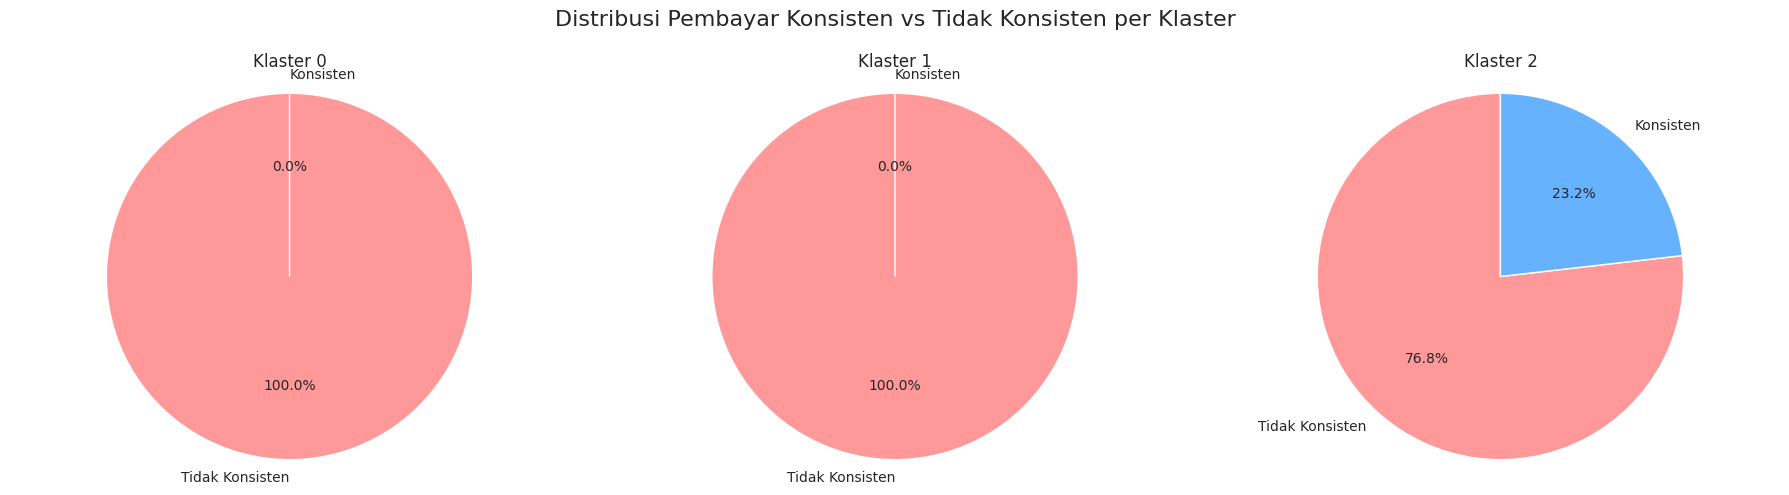

In [69]:
#membuat plot pie chart untuk melihat komposisi pembayar tepat waktu yang konsisten setiap klaster
consistent_payer_counts = df_analysis.groupby('cluster')['consistent_payer'].value_counts().unstack()
consistent_payer_counts = consistent_payer_counts.fillna(0)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

labels = ['Tidak Konsisten', 'Konsisten']
colors = ['#ff9999','#66b2ff']

for i, (cluster, values) in enumerate(consistent_payer_counts.iterrows()):
    axes[i].pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Klaster {cluster}')
    axes[i].axis('equal')

plt.suptitle('Distribusi Pembayar Konsisten vs Tidak Konsisten per Klaster', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


Berdasarkan plot pie chart di atas, dapat terlihat dengan jelas bahwa untuk nasabah yang konsisten membayar tepat waktu hanya ada pada klaster 2 dengan persentase 23,2% dari klaster 2 sebanyak 1992 nasabah. Sehingga dalam hal ini saya akan menganalisa lebih dalam untuk karakteristik kelompok pelanggan ini.

In [70]:
#memfilter data untuk consistent_payer = 1
consistent_payers = df_analysis[df_analysis['consistent_payer'] == 1]

#melihat statistic deskriptive untuk beberapa kolom
continuous_features = ['limit_amount', 'age', 'total_bill', 'total_payment']
continuous_stats = consistent_payers[continuous_features].describe()

continuous_stats


limit_amount          age     total_bill  total_payment
count    1992.000000  1992.000000    1992.000000    1992.000000
mean   220502.008032    37.222390   40459.721637   38971.640562
std    124049.572065     8.669398   59631.661191   60666.069761
min     10000.000000    21.000000      72.000000     300.000000
25%    140000.000000    30.000000    7176.750000    6352.250000
50%    200000.000000    36.000000   21789.000000   19120.000000
75%    300000.000000    43.000000   48740.250000   45838.750000
max    710000.000000    69.000000  622347.000000  697978.000000

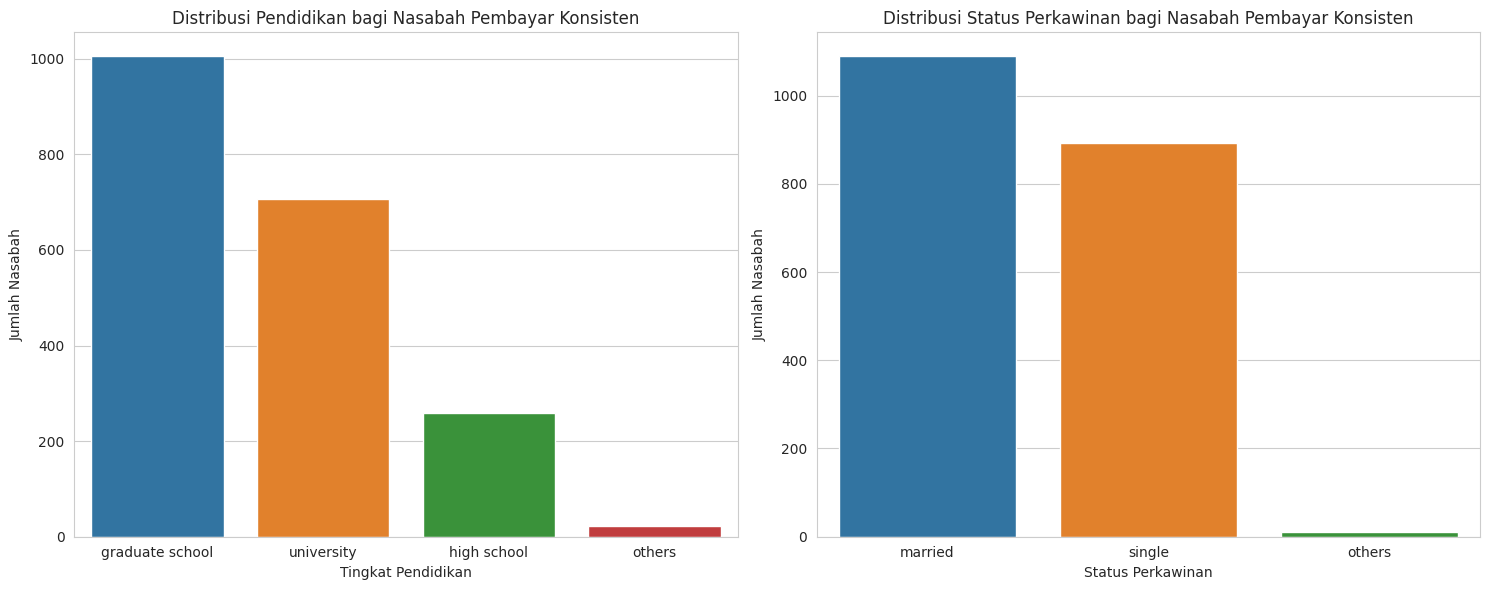

In [71]:
#plot bar untuk melihat karakteristik kolom kategorikal setiap nasabah
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=consistent_payers, x='education', order=consistent_payers['education'].value_counts().index)
plt.title("Distribusi Pendidikan bagi Nasabah Pembayar Konsisten")
plt.ylabel("Jumlah Nasabah")
plt.xlabel("Tingkat Pendidikan")

plt.subplot(1, 2, 2)
sns.countplot(data=consistent_payers, x='marital_status', order=consistent_payers['marital_status'].value_counts().index)
plt.title("Distribusi Status Perkawinan bagi Nasabah Pembayar Konsisten")
plt.ylabel("Jumlah Nasabah")
plt.xlabel("Status Perkawinan")

plt.tight_layout()
plt.show()

Pada penelusuran di atas, saya melakukan penelusuran karakteristik pembayar konsisten dari beberapa kolom numerikal seperti limit kredit, usia, total tagihan, dan total pembayaran saja. Kemudian saya melakukan penelusuran terhadap kolom kategorikalnya. Berikut adalah hasil pengamatan saya:

* Limit Kredit:
Rata-rata limit kredit bagi nasabah yang konsisten dalam pembayarannya adalah sekitar 220.502 unit.
Rentang limit kredit berkisar dari 10.000 hingga 710.000 unit.
* Usia:
Rata-rata usia dari nasabah ini adalah sekitar 37 tahun.
Usia nasabah berkisar dari 21 hingga 69 tahun.
* Total Tagihan:
Rata-rata total tagihan bagi nasabah ini adalah sekitar 40.460 unit.
Total tagihan nasabah berkisar dari 72 hingga 622.347 unit.
* Total Pembayaran:
Rata-rata total pembayaran bagi nasabah ini adalah sekitar 38.972 unit.
Total pembayaran nasabah berkisar dari 300 hingga 697.978 unit.
* Pendidikan:
Mayoritas nasabah pembayar konsisten memiliki latar belakang pendidikan graduate school atau pascasarjana. Nasabah dengan latar belakang pendidikan university berada di urutan ke 2, dengan diikuti dengan perbedaan yang cukup signifikan di kategori pendidikan high school dan others
* Status Perkawinan:
Sebagian besar nasabah pembayar konsisten adalah married yang diikuti oleh kategori single di urutan ke 2 dengan perbedaan yang tidak terlalu jauh.


## #6. Delayed_Payments

Kolom Delayed_Payments memiliki kepentingan yang signifikan dalam analisis kredit dan risiko bagi lembaga keuangan. Berikut adalah beberapa alasan mengapa Delayed_Payments penting:

* Indikator Risiko Kredit: Jumlah keterlambatan pembayaran adalah salah satu indikator paling kuat dari risiko kredit seorang nasabah. Nasabah yang memiliki riwayat keterlambatan pembayaran mungkin memiliki risiko gagal bayar yang lebih tinggi di masa depan.

* Mengukur Kesulitan Keuangan: Keterlambatan pembayaran dapat menunjukkan bahwa nasabah menghadapi kesulitan keuangan. Ini bisa karena berbagai alasan, seperti kehilangan pekerjaan, pengeluaran mendadak, atau manajemen keuangan yang buruk.

* Panduan untuk Tindakan: Berdasarkan jumlah keterlambatan pembayaran, lembaga keuangan dapat menentukan tindakan yang sesuai, seperti menawarkan konseling keuangan, menyesuaikan limit kredit, atau mengambil tindakan penagihan.

* Optimasi Strategi Penagihan: Mengetahui nasabah mana yang sering terlambat membayar memungkinkan tim penagihan untuk mengalokasikan sumber daya mereka dengan lebih efisien, menargetkan nasabah yang paling mungkin memerlukan intervensi.

* Pendapatan Tambahan: Bagi lembaga keuangan, keterlambatan pembayaran bisa berarti pendapatan tambahan dalam bentuk denda atau bunga keterlambatan. Namun, hal ini harus diimbangi dengan potensi risiko gagal bayar.

* Pengembangan Produk: Memahami profil keterlambatan pembayaran dapat membantu lembaga keuangan dalam mengembangkan produk atau layanan baru yang disesuaikan dengan kebutuhan dan profil risiko nasabah.



In [72]:
#membuat dataframe dari jumlah nasabah berdasarkan kategori kolom delayed_payments dan klaster
pd.DataFrame(df_analysis.groupby('cluster')['delayed_payments'].value_counts())

delayed_payments
cluster delayed_payments                  
0       6                             6020
        5                              535
        4                              141
        3                               45
        2                               11
1       6                            12828
        5                             1170
        4                              591
        3                               63
        2                                1
2       0                             1992
        1                             1434
        2                             1385
        3                             1264
        4                             1049
        6                              924
        5                              547

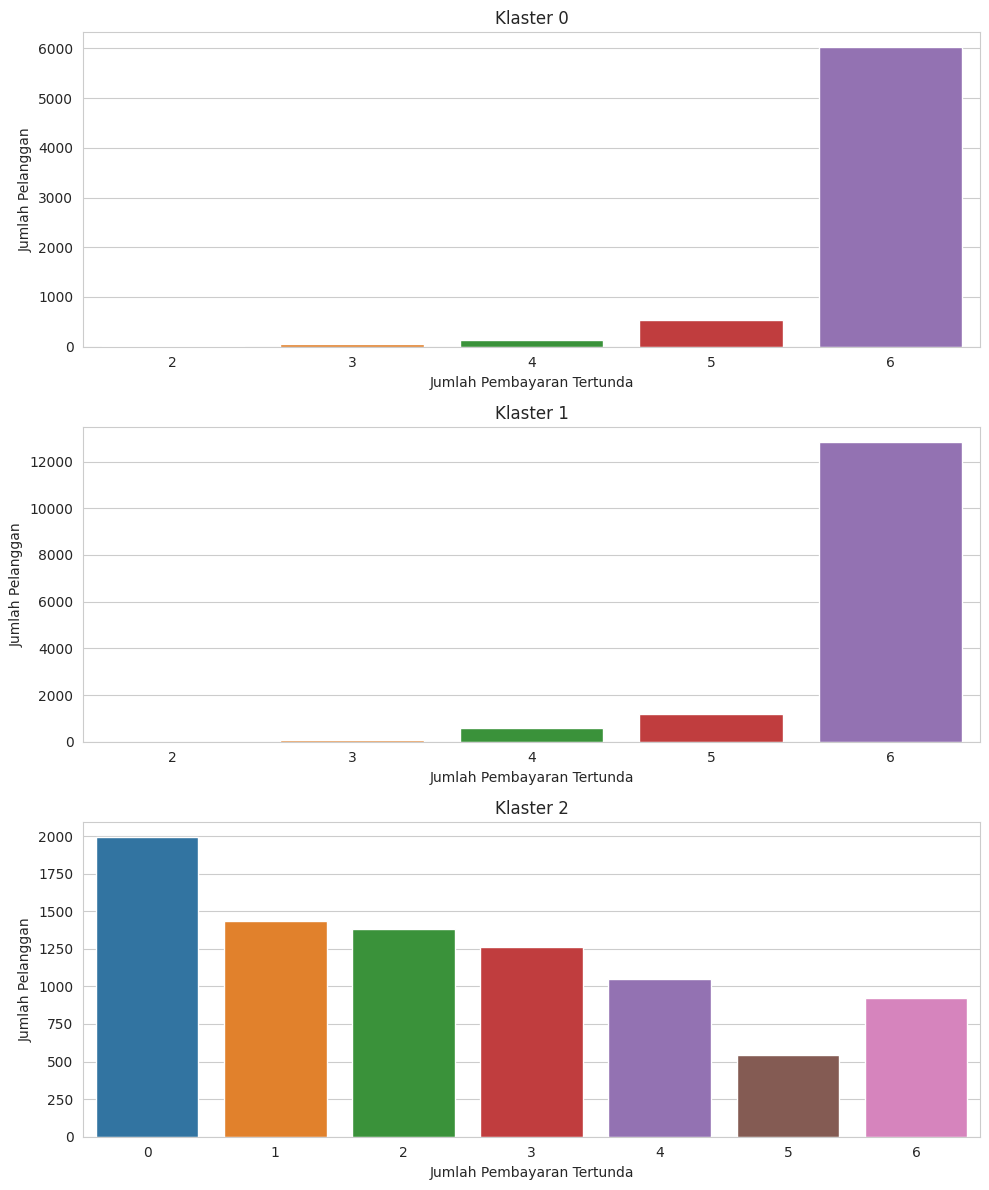

In [73]:
#melihat plot bar untuk kategori delayed_payments setiap klaster
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

for cluster in df_analysis['cluster'].unique():
    sns.countplot(data=df_analysis[df_analysis['cluster'] == cluster], x='delayed_payments', ax=axes[cluster])
    axes[cluster].set_title(f'Klaster {cluster}')
    axes[cluster].set_ylabel('Jumlah Pelanggan')
    axes[cluster].set_xlabel('Jumlah Pembayaran Tertunda')

plt.tight_layout()
plt.show()


Dari visualisasi bar plot di atas, saya menarik beberapa kesimpulan tentang karakteristik delayed_payments di setiap klaster sebagai berikut:

* Klaster 0: Nasabah di klaster ini cenderung memiliki perilaku pembayaran yang tertunda yang sangat konsisten, dengan memiliki persentase sebesar 90% dari total klaster yang memiliki nilai delayed_payments sebesar 6. Ini menunjukkan bahwa pelanggan di klaster ini memiliki pola tertunda dalam pembayaran mereka sepanjang waktu.

* Klaster 1: Nasabah di klaster ini, memiliki karakteristik delayed_payments yang sama dengan klaster 0, dengan jumlah kelompok nasabah yang lebih banyak. Hal ini menunjukkan resiko yang lebih tinggi untuk klaster ini bagi bisnis.

* Klaster 2: Klaster ini menunjukkan variasi yang paling besar dalam perilaku pembayaran. Ada pelanggan yang selalu membayar tepat waktu (nilai 0), tetapi ada juga pelanggan yang memiliki beberapa bulan tertunda dalam pembayaran mereka. Visualisasi di atas ini menunjukkan bahwa ada sejumlah pelanggan di klaster ini yang memiliki perilaku pembayaran yang baik, sementara yang lainnya memiliki perilaku pembayaran yang tertunda.

Dapat dilihat bahwa delayed_payments adalah indikator penting dari perilaku pembayaran pelanggan. Klaster dengan nilai tertunda yang tinggi menunjukkan risiko yang lebih besar, karena pelanggan ini lebih cenderung memiliki pola pembayaran yang tidak konsisten atau tertunda. Sebaliknya, klaster dengan variasi yang lebih besar dalam perilaku pembayaran menunjukkan adanya peluang untuk mengidentifikasi dan mendukung pelanggan yang memiliki perilaku pembayaran yang lebih baik.





## #7. Sequential_Delay

Kolom ini menjelaskan apakah pelanggan mengalami keterlambatan pembayaran berturut-turut selama tiga bulan terakhir. Keterlambatan berturut-turut menunjukkan pola perilaku pembayaran yang memburuk dan mungkin lebih berisiko bagi pemberi kredit.Berikut adalah beberapa alasan mengapa menganalisis kolom tersebut penting:

* Deteksi Risiko Dini: Nasabah yang menunjukkan keterlambatan pembayaran secara berurutan dalam beberapa bulan berturut-turut mungkin menunjukkan tanda-tanda kesulitan keuangan atau ketidakmampuan untuk membayar hutangnya. Mengidentifikasi nasabah seperti ini pada tahap awal dapat membantu institusi kredit mengambil tindakan pencegahan.

* Optimalisasi Strategi Penagihan: Dengan mengetahui nasabah mana yang memiliki kecenderungan keterlambatan pembayaran berturut-turut, tim penagihan dapat mengoptimalkan strategi mereka, misalnya dengan memberikan pengingat lebih awal atau menawarkan skema pembayaran khusus untuk nasabah tersebut.

* Pemberian Kredit yang Lebih Tepat: Analisis ini dapat menjadi pertimbangan penting dalam keputusan pemberian kredit di masa depan. Nasabah dengan riwayat keterlambatan berturut-turut mungkin perlu mendapatkan penawaran kredit dengan ketentuan yang berbeda atau bahkan penilaian risiko yang lebih ketat.

* Pengelolaan Risiko Kredit: Memahami perilaku keterlambatan pembayaran nasabah memungkinkan perusahaan untuk mengelola risiko kredit dengan lebih baik, mengalokasikan sumber daya dengan lebih efisien, dan meramalkan potensi kerugian akibat gagal bayar.

* Pemahaman Lebih Dalam Tentang Profil Nasabah: Dengan memahami perilaku keterlambatan pembayaran, perusahaan dapat memiliki gambaran yang lebih baik tentang profil nasabah, baik dari segi keuangan, perilaku, maupun kebutuhan mereka. Hal ini dapat memandu perusahaan dalam mengembangkan produk atau layanan yang lebih sesuai.

In [74]:
#membuat dataframe dari jumlah nasabah berdasarkan kategori kolom sequential_delay per klaster
pd.DataFrame(df_analysis.groupby('cluster')['sequential_delay'].value_counts())

sequential_delay
cluster sequential_delay                  
0       0                             6324
        1                              428
1       0                            13310
        1                             1343
2       0                             8574
        1                               21

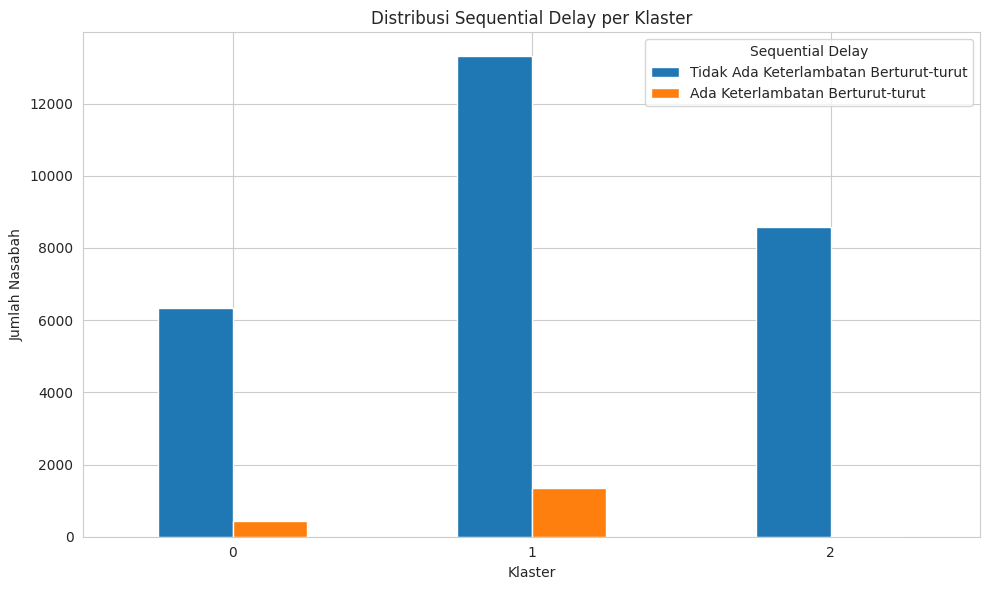

In [75]:
#membuat plot bar berdasarkan dataframe di atas
sequential_delay_distribution = df_analysis.groupby('cluster')['sequential_delay'].value_counts().unstack().fillna(0)

sequential_delay_distribution.plot(kind='bar', figsize=(10, 6))

plt.title("Distribusi Sequential Delay per Klaster")
plt.xlabel("Klaster")
plt.ylabel("Jumlah Nasabah")
plt.xticks(rotation=0)
plt.legend(title="Sequential Delay", labels=['Tidak Ada Keterlambatan Berturut-turut', 'Ada Keterlambatan Berturut-turut'])
plt.tight_layout()
plt.show()

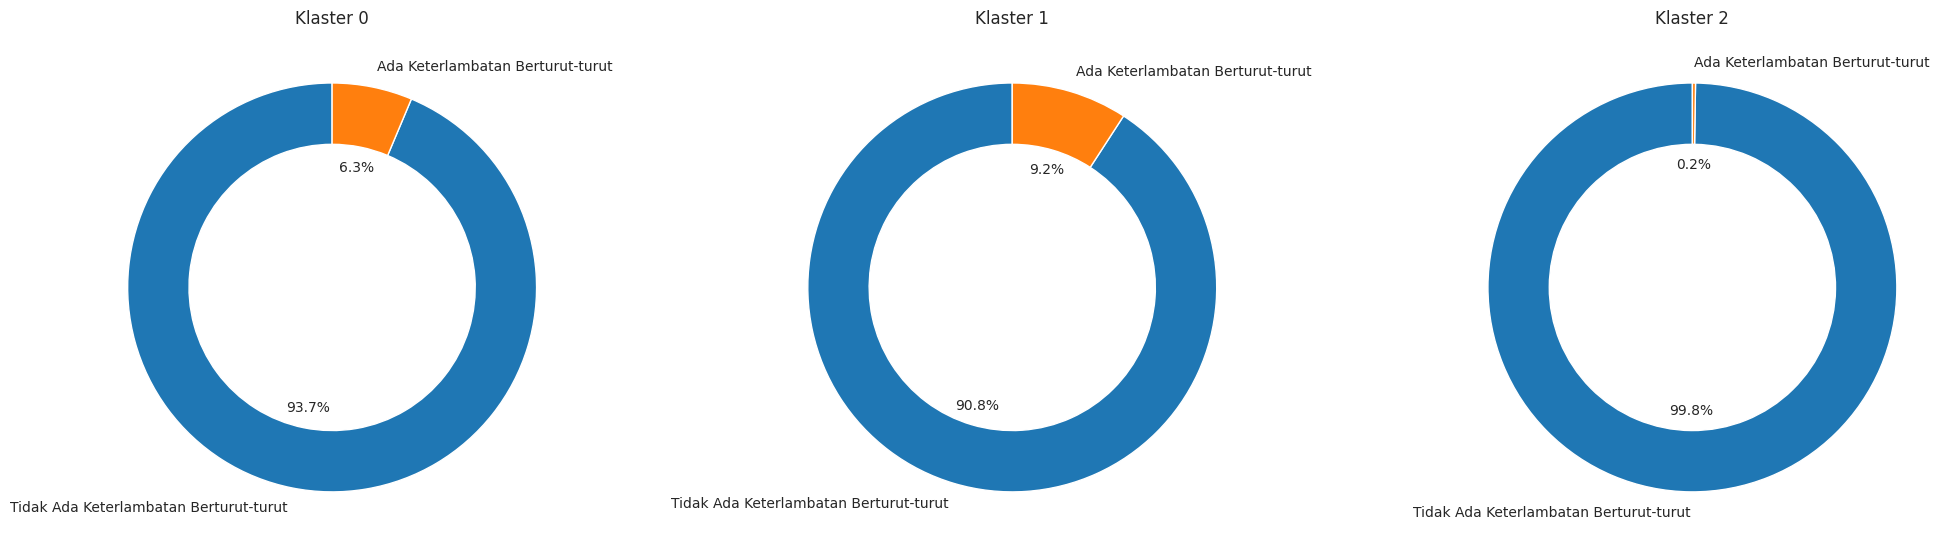

In [76]:
#membuat versi plot bar untuk melihat komposisi persentase
cluster_sequential_delay = df_analysis.groupby(['cluster', 'sequential_delay']).size().unstack().fillna(0)

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

labels = ['Tidak Ada Keterlambatan Berturut-turut', 'Ada Keterlambatan Berturut-turut']

for cluster, axis in enumerate(ax):
    sizes = cluster_sequential_delay.loc[cluster]
    axis.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
    axis.set_title(f"Klaster {cluster}")

plt.tight_layout()
plt.show()


Dari visualisasi di atas, dapat dilihat perilaku nasabah berdasarkan keberadaan "keterlambatan pembayaran berturut-turut di 3 bulan terakhir" (atau yang disebut "sequential delay") di setiap klaster. Berikut adalah beberapa observasi utama:

* Klaster 0:
Mayoritas pelanggan di klaster ini tidak memiliki riwayat keterlambatan pembayaran berturut-turut di 3 bulan terakhir.
Hanya sebagian kecil dari pelanggan di klaster ini yang memiliki riwayat keterlambatan pembayaran berturut-turut.
* Klaster 1:
Sama seperti klaster 0, mayoritas pelanggan di klaster ini tidak memiliki riwayat keterlambatan pembayaran 3 bulan berturut-turut, dengan hanya sebagian yang ada keterlambatan pembayaran berturut-turut. Namun perbedaannya klaster ini memiliki persentase perbandingan yang lebih besar pada nasabah yang memiliki keterlambatan.
Klaster 2:
Mayoritas dari klaster ini tidak memiliki keterlambatan pembayaran 3 bulan terakhir. Walaupun juga ada beberapa nasabah yang memiliki pembayaran terlambat secara berturut-turut 3 bulan terakhir, namun jumlah ini sangat sedikit.

**Kesimpulan**:

Secara umum setiap klaster masih memiliki karakter yang sama, yaitu memiliki nasabah yang tidak melakukan keterlambatan pembayaran secara berturut-turut dalam 3 bulan terakhir dan ada yang melakukan keterlambatan. Namun jika dibandingkan dengan persentase perbandingan jumlah yang memiliki keterlambatan berturut dengan yang tidak, maka resiko tertinggi ada di klaster 1 dengan 9,2% persentase nasabah yang memiliki keterlambatan

## #8. Recent Bill to Limit_amount

Kolom ini menggambarkan rasio antara jumlah tagihan terbaru yang dimiliki nasabah dengan batas kredit yang mereka miliki. Memahami rasio ini penting karena beberapa alasan:

* Pemahaman Tentang Pemanfaatan Kredit: Rasio ini memberikan gambaran tentang sejauh mana nasabah memanfaatkan fasilitas kredit yang diberikan kepadanya. Seorang nasabah yang memiliki rasio tinggi menunjukkan bahwa ia mendekati batas kreditnya, yang bisa menjadi indikasi dari kebutuhan finansial yang tinggi atau perilaku belanja yang berlebihan.

* Risiko Kredit: Nasabah dengan rasio yang tinggi mungkin memiliki risiko kredit yang lebih besar. Jika rasio ini mendekati atau mencapai 100%, ini menunjukkan bahwa nasabah tersebut telah memanfaatkan hampir seluruh batas kreditnya, yang bisa meningkatkan risiko gagal bayar.

* Pendekatan Manajemen Risiko: Dengan mengetahui rasio ini, perusahaan dapat mengambil pendekatan manajemen risiko yang lebih tepat, misalnya dengan menawarkan program pelunasan kredit, menyesuaikan batas kredit, atau memberikan edukasi keuangan kepada nasabah.

* Oportunisme: Nasabah dengan rasio yang rendah menunjukkan bahwa mereka tidak memaksimalkan fasilitas kredit yang diberikan. Dari perspektif bisnis, ini bisa menjadi kesempatan untuk menawarkan produk atau layanan tambahan.

* Kesehatan Keuangan Nasabah: Rasio yang rendah juga bisa menunjukkan bahwa nasabah memiliki kesehatan keuangan yang baik, di mana mereka tidak terlalu bergantung pada kredit untuk memenuhi kebutuhan mereka.

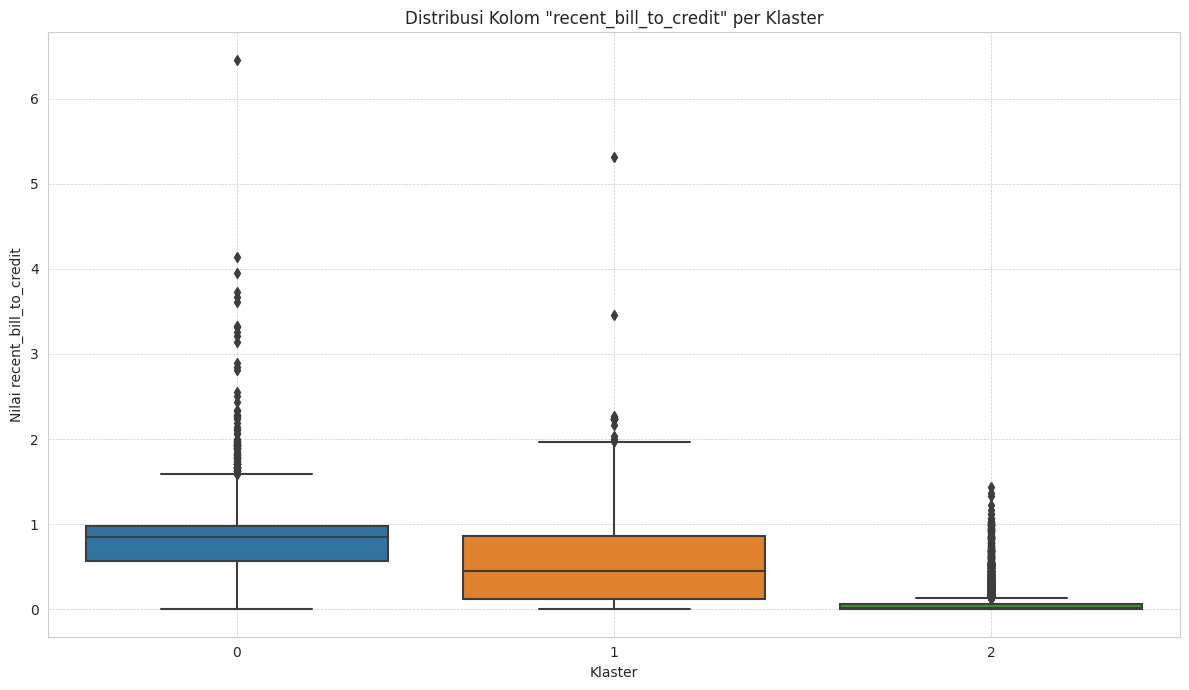

In [77]:
#membuat boxplot dari recent_bill_to_credit setiap klaster
plt.figure(figsize=(12, 7))
sns.boxplot(x='cluster', y='recent_bill_to_credit', data=df_analysis)

plt.title('Distribusi Kolom "recent_bill_to_credit" per Klaster')
plt.xlabel('Klaster')
plt.ylabel('Nilai recent_bill_to_credit')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Berdasarkan plot di atas, berikut adalah pengamatan yang bisa diambil:

Klaster 0:

* Klaster ini memiliki median (garis tengah) yang lebih tinggi dibandingkan klaster lain, menunjukkan bahwa pelanggan di klaster ini cenderung memiliki tagihan yang lebih besar relatif terhadap batas kredit mereka.
* Rentang antara Q1 (kuartil bawah) dan Q3 (kuartil atas) lebih kecil dibandingkan klaster lain, menunjukkan bahwa distribusi data di klaster ini lebih konsentrasi. Tidak ada outlier yang terdeteksi.

Klaster 1:

* Klaster ini memiliki distribusi yang lebih merata dengan beberapa outlier di bagian atas.
* Median dari klaster ini berada di antara klaster 0 dan klaster 2, menunjukkan bahwa pelanggan di klaster ini memiliki tagihan yang moderat relatif terhadap batas kredit mereka.


Klaster 2:

* Distribusi dari klaster ini relatif lebih merata dibandingkan klaster lain, dengan nilai rata-rata (ditunjukkan dengan garis tengah dalam box) yang lebih rendah.
* Sebagian besar nilai berada di kisaran bawah, tetapi ada beberapa outlier di bagian atas. Ini mengindikasikan bahwa sebagian besar pelanggan di klaster ini memiliki tagihan yang relatif kecil dibandingkan dengan batas kredit mereka, namun ada beberapa yang memiliki tagihan mendekati batas kredit.

In [78]:
#melihat rata-rata recent_bill_to_credit setiap klaster
df_analysis.groupby('cluster')['recent_bill_to_credit'].mean()

cluster
0    0.771265
1    0.486483
2    0.059473
Name: recent_bill_to_credit, dtype: float64

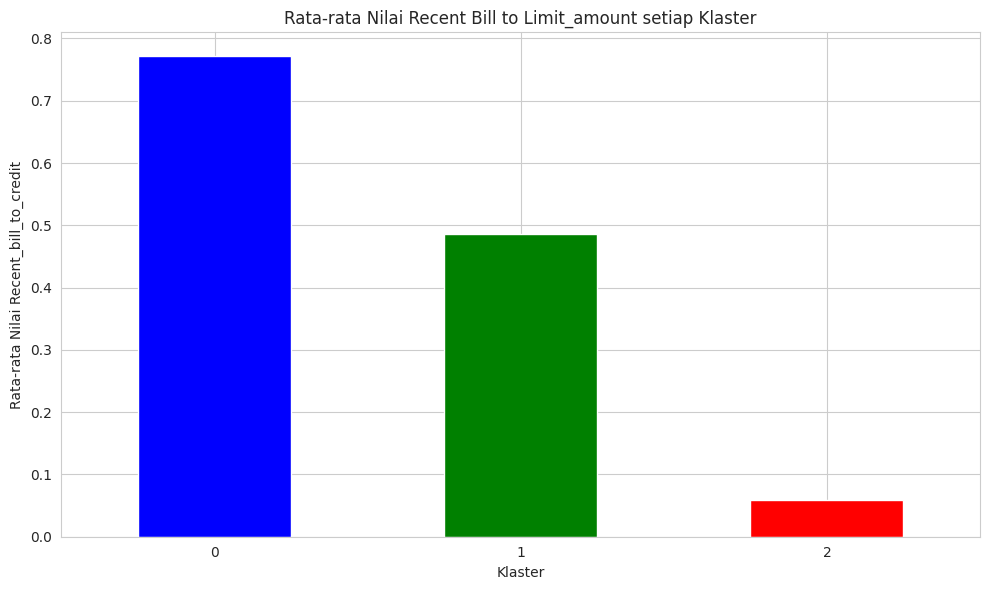

In [79]:
#membuat plot bar berdasarkan dataframe di atas
recent_bill_to_credit_means = df_analysis.groupby('cluster')['recent_bill_to_credit'].mean()

plt.figure(figsize=(10, 6))
recent_bill_to_credit_means.plot(kind='bar', color=['blue', 'green', 'red'])

plt.title("Rata-rata Nilai Recent Bill to Limit_amount setiap Klaster")
plt.xlabel("Klaster")
plt.ylabel("Rata-rata Nilai Recent_bill_to_credit")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Dari visualisasi bar chart di atas, dapat ditarik beberapa kesimpulan mengenai rata-rata nilai "Recent Bill to Credit" untuk setiap klaster:

* Klaster 0: Klaster ini memiliki rata-rata nilai "Recent Bill to Credit" yang paling tinggi. Ini menandakan bahwa nasabah dalam klaster ini cenderung hampir melebihi batas kredit mereka dalam tagihan terbaru mereka. Ini bisa menjadi tanda bahwa mereka bergantung pada kredit mereka atau mungkin mereka membelanjakan lebih banyak daripada yang mereka mampu.

* Klaster 1: Nasabah dalam klaster ini memiliki rata-rata nilai "Recent Bill to Credit" yang berada di antara Klaster 0 dan Klaster 2. Meskipun tidak setinggi Klaster 1, nasabah di sini tampaknya menggunakan sebagian besar dari kredit yang tersedia untuk mereka.

* Klaster 2: Klaster ini memiliki rata-rata nilai "Recent Bill to Credit" yang paling rendah dibandingkan dengan dua klaster lainnya. Ini menunjukkan bahwa nasabah dalam klaster ini cenderung memiliki tagihan terbaru yang relatif kecil dibandingkan dengan batas kredit mereka. Dengan kata lain, nasabah di klaster ini tampaknya menggunakan kredit mereka dengan lebih bijak dan berada dalam batas yang aman dari batas kredit yang diberikan.

Dalam konteks bisnis, memahami perilaku penggunaan kredit ini penting. Untuk Klaster 0, misalnya, mungkin diperlukan pendekatan yang lebih hati-hati dalam memberikan penawaran kredit tambahan atau meningkatkan batas kredit mereka, mengingat perilaku penggunaan kredit mereka yang tinggi. Sedangkan untuk Klaster 2, mungkin ada peluang untuk menawarkan peningkatan batas kredit atau produk kredit lainnya, mengingat perilaku penggunaan kredit mereka yang lebih konservatif.

#Kesimpulan, Saran Bisnis, dan Pengembangan

**Kesimpulan**

Klaster 0 (Konsumen Aktif dengan Perilaku Pembelian yang Berfluktuasi):

* ***Utilization Ratio***: Klaster ini memiliki tingkat pemanfaatan kredit yang tinggi, menunjukkan ketergantungan yang lebih besar pada fasilitas kredit yang disediakan.
* ***Total Payment***: Mereka memiliki pembayaran total yang lebih tinggi dengan variasi yang signifikan menunjukkan ada fluktuasi jumlah pembayaran.
* ***Total Bill***: Mereka cenderung memiliki tagihan yang lebih tinggi, menunjukkan konsumsi kredit yang lebih intensif.
* ***Trend Payment & Bill***: Ada fluktuasi signifikan antara tagihan dan pembayaran, menunjukkan potensi kesulitan keuangan atau pola pembelian yang tidak tetap.
* ***Duly Payer***: Klaster ini tidak memiliki nasabah yang membayar tepat waktu terus-menerus selama 6 bulan
* ***Delayed_Payments***: Klaster ini memiliki sejumlah besar nasabah dengan keterlambatan pembayaran, menunjukkan risiko yang lebih tinggi.
* ***Sequential_Delay***: Sejumlah nasabah memiliki pola keterlambatan pembayaran yang berurutan, meningkatkan risiko kredit.
* ***Recent Bill to Limit_amount***: Mereka mendekati atau bahkan melebihi batas kredit mereka, menunjukkan ketergantungan yang lebih besar pada kredit.

Klaster 1 (Konsumen dengan Peningkatan Konsumsi dan Potensi Kesulitan Keuangan):

* ***Utilization Ratio***: Klaster ini memanfaatkan sebagian besar dari batas kredit mereka namun tidak sepenuhnya, menunjukkan penggunaan yang lebih hati-hati.
* ***Total Payment***: Pembayaran total yang moderat dengan variasi pembayaran yang lebih konsisten.
* ***Total Bill***: Tagihan moderat namun menunjukkan potensi akumulasi hutang.
* ***Trend Payment & Bill***: Kenaikan yang konsisten pada tren pembayaran dan tagihan. Namun perlu diperhatikan dengan tagihan yang lebih besar dari klaster 2, mereka memiliki pembayaran yang lebih rendah dari klaster 2.
* ***Duly Payer***: Klaster ini tidak memiliki nasabah yang membayar tepat waktu terus-menerus selama 6 bulan
* ***Delayed_Payments***: Memiliki karakteristik yang sama dengan klaster 0, di mana terlalu banyak nasabah yang menunda pembayaran, dan bahkan dengan jumlah nasabah yang lebih banyak di klaster ini dibanding dengan klaster 0.
* ***Sequential_Delay***: Ada risiko keterlambatan berurutan yang perlu diperhatikan.
* ***Recent Bill to Limit_amount***: Mereka menggunakan batas kredit sama dengan klaster 0 namun dengan jumlah yang lebih sedikit.

Klaster 2 (Konsumen Stabil dan Dapat Diandalkan):

* ***Utilization Ratio***: Penggunaan kredit yang rendah menunjukkan perilaku keuangan yang konservatif.
* ***Total Payment***: Pembayaran yang lebih rendah namun konsisten.
* ***Total Bill***: Tagihan rendah menunjukkan penggunaan kredit yang lebih jarang atau hati-hati.
* ***Trend Payment & Bill***: Stabilitas dalam penggunaan kredit dan pembayaran menunjukkan risiko rendah.
* ***Duly Payer***: Memiliki 22% nasabah yang merupakan pembayar tepat waktu selama 6 bulan berturut
* ***Delayed_Payments***: Risiko keterlambatan mungkin rendah di klaster ini.
* ***Sequential_Delay***: Keterlambatan berurutan mungkin jarang terjadi, menunjukkan manajemen keuangan yang baik.
* ***Recent Bill to Limit_amount***: Mereka memiliki tagihan terbaru yang relatif kecil dibandingkan dengan batas kredit mereka, menunjukkan perilaku keuangan yang bijaksana.


Dari kesimpulan di atas, klaster 0 memiliki risiko kredit yang paling tinggi namun juga menawarkan peluang bisnis yang signifikan karena aktivitas kreditnya yang tinggi. Klaster 1 menunjukkan resiko yang sama dengan klaster 0, dengan nominal uang yang lebih rendah namun memiliki jumlah nasabah yang tinggi di klaster ini. Klaster 2 menunjukkan risiko kredit yang paling rendah dan mungkin merupakan target yang baik untuk penawaran kredit tambahan karena stabilitas keuangannya, namun mungkin saja klaster ini merupakan kelas ekonomi yang sederhana dengan karakter yang sangat berhati-hati dalam penggunaan kartu kredit.

**Saran Bisnis**

Klaster 0 (Risiko Tinggi, Konsumen Aktif):

* Pendekatan Proaktif: Mengingat risiko yang lebih tinggi dari klaster ini, perusahaan kredit harus proaktif dalam memantau perilaku kredit nasabah dan melakukan pendekatan komunikasi yang lebih intensif untuk memahami kebutuhan dan tantangan keuangan mereka.
* Program Edukasi Keuangan: Sebagai bagian dari pendekatan proaktif, perusahaan bisa menawarkan program edukasi keuangan untuk membantu nasabah memahami manajemen hutang dan keuangan pribadi.
* Promosi Bertarget: Meskipun klaster ini menunjukkan risiko, mereka juga aktif dalam menggunakan kredit. Oleh karena itu, promosi atau penawaran yang tepat sasaran bisa efektif untuk memaksimalkan potensi pendapatan dari klaster ini tanpa meningkatkan risiko.

Klaster 1 (Risiko Sedang, Jumlah Nasabah Tinggi):

* Pembatasan Kenaikan Limit: Sebaiknya hindari meningkatkan limit kredit dengan cepat untuk klaster ini. Pendekatan yang lebih konservatif dalam menaikkan batas kredit akan lebih bijaksana.
* Program Loyalitas: Mengingat jumlah nasabah yang tinggi di klaster ini, perusahaan bisa mempertimbangkan program loyalitas untuk menghargai nasabah atas konsistensi mereka, sekaligus mendorong penggunaan kredit yang lebih bertanggung jawab.
* Pendekatan Personalisasi: Karena klaster ini memiliki jumlah nasabah yang banyak, pendekatan personalisasi melalui komunikasi atau penawaran khusus bisa efektif dalam mempertahankan dan meningkatkan hubungan dengan nasabah.

Klaster 2 (Risiko Rendah, Konsumen Hati-hati):

* Penawaran Kredit Tambahan: Mengingat risiko rendah dan stabilitas keuangan klaster ini, perusahaan bisa mempertimbangkan menawarkan produk kredit tambahan atau meningkatkan limit kredit mereka.
* Pendidikan Keuangan Lanjutan: Meskipun klaster ini menunjukkan perilaku keuangan yang baik, program edukasi keuangan lanjutan bisa membantu mereka memaksimalkan penggunaan produk kredit yang ada.
* Promosi Khusus: Mengingat sifat hati-hati mereka dalam menggunakan kredit, promosi khusus atau penawaran dengan nilai tambah bisa menjadi cara yang efektif untuk mendorong mereka untuk lebih aktif menggunakan fasilitas kredit.

**Pengembangan Penelitian**

Dengan klaster yang sudah diperoleh, dapat dilakukan perbandingan dengan kolom target yang sudah ada, yaitu default_payment. Dapat dilakukan perbandingan karakteristik dari kategori default_payment dan kategori klaster. Selain itu, dengan adanya kolom klaster yang memiliki karakteristik tertentu setiap klasternya, maka kolom ini dapat digunakan sebagai target untuk pengembangan model prediktif selanjutnya.